In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import datetime
import numpy as np
# from tqdm import tqdm
import warnings
from glob import glob
import tensorflow as tf
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers
# from sklearn.model_selection import train_test_split
# from pandasql import sqldf
from sklearn.preprocessing import StandardScaler
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings(action='ignore')
from matplotlib import font_manager, rc
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# font_path = "C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)
from sklearn.manifold import TSNE
import re
# import talib as tb

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (4,335 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [3]:
df_레이아웃 = pd.read_excel('/content/drive/MyDrive/nice공모전/data/넘블 챌린지 개방데이터 레이아웃.xlsx')
df_레이아웃.head()

,순서,테이블명,영문칼럼명,한글칼럼명,칼럼형식,디폴트값,NULL여부,비고
0,1.0,기업개요,BIZ_NO,사업자등록번호,VARCHAR2(10),'Z',N,NaN
1,2.0,기업개요,CMP_PFIX_NM,기업접두명,VARCHAR2(64),NaN,Y,NaN
2,3.0,기업개요,CMP_NM,기업명,VARCHAR2(128),NaN,Y,NaN
3,4.0,기업개요,CMP_SFIX_NM,기업접미명,VARCHAR2(64),NaN,Y,NaN
4,5.0,기업개요,CMP_ENM,기업영문명,VARCHAR2(256),NaN,Y,NaN


In [4]:
df_코드집 = pd.read_excel('/content/drive/MyDrive/nice공모전/data/넘블 챌린지 개방데이터 코드집.xlsx', sheet_name = '코드집')
df_코드집.head()


,GRP_CD,CD,END_DATE,STRT_DATE,CD_NM
0,BZ_TYP,A,99991231,20191201,신금(신용금고)
1,BZ_TYP,B,99991231,20191201,은행
2,BZ_TYP,C,99991231,20191201,카드
3,BZ_TYP,F,99991231,20191201,생보(생명보험)
4,BZ_TYP,I,99991231,20191201,손보(손해보험)


In [5]:
df_co_재무계정 = pd.read_excel('/content/drive/MyDrive/nice공모전/data/넘블 챌린지 개방데이터 코드집.xlsx', sheet_name = '재무계정')
df_co_재무계정.head()

,계정코드,순번,계정명,영문
0,M11000,1,유동자산,Current Assets
1,M11001,2,*국고보조금,*Governments Grants
2,M11002,3,현금,Cash
3,M11003,4,외화,Foreign Currencies
4,M11004,5,예금,Bank Deposits


In [6]:
df_액티브중소법인재무_기업개요외감 = pd.read_csv('/content/drive/MyDrive/nice공모전/data/액티브 중소법인 재무보유00.csv')
                                   #,  converters= {'ESTB_DATE': pd.to_datetime}  )  #parse_dates=['ESTB_DATE'])
# df_액티브중소법인재무_기업개요외감.to_csv("./df_액티브중소법인재무_기업개요외감.csv", index=False)

In [7]:
df_액티브중소법인재무_기업개요 = pd.read_excel('/content/drive/MyDrive/nice공모전/data/액티브 중소법인 재무보유.xlsx', sheet_name = '기업개요')
df_액티브중소법인재무_기업개요.head()

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_NM1,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,FR_IVST_CORP_YN,VENT_YN,LIST_CD,IND_CD_ORDR,IND_CD1,IND_CD2,IND_CD3,PB_ORG_TYP,MDSCO_PRTC_YN,TAXN_TYP,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
0,2218116923,NaN,NaN,신우종합건설,(주),"Shinu General Construction Co., Ltd.",M,4,2,2,1,1,N,N,NaN,10.0,41200.0,NaN,NaN,0,N,3.0,NaN,20000807.0,1.0,NaN,토목공사업,NaN,NaN,김주대외 1명,12.0
1,1138111739,NaN,한일가스산업(주),한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,3,2,2,1,1,N,N,NaN,10.0,47712.0,NaN,NaN,0,N,3.0,NaN,19660419.0,1.0,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0
2,1108146490,(주),NaN,랩솔루션,NaN,Lab Solution,M,4,2,2,1,1,N,N,NaN,10.0,27210.0,27213.0,NaN,0,N,3.0,NaN,20000612.0,1.0,NaN,기체분석기 등,NaN,www.lab-solution.com,김봉철,3.0
3,3128134737,(주),NaN,고려인삼제품공사,NaN,"KOREAN GINSENG PRODUCT CO., LTD",M,4,2,2,1,1,N,N,NaN,10.0,10795.0,NaN,NaN,0,N,3.0,NaN,19920301.0,1.0,NaN,"다류, 차, 인삼제품, 음료, 코코아가공품, 커피",NaN,www.kitea.co.kr,박경출,24.0
4,2078132193,(주),(주)엠피아이,엠피아이,NaN,"EMPIALEE CO.,LTD.",M,3,2,2,1,1,N,N,NaN,10.0,15190.0,NaN,NaN,0,N,3.0,NaN,19910806.0,1.0,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0


In [8]:
df_액티브중소법인재무_휴폐업이력 = pd.read_excel('/content/drive/MyDrive/nice공모전/data/액티브 중소법인 재무보유.xlsx', sheet_name = '휴폐업이력')
df_액티브중소법인재무_휴폐업이력.head()

,BIZ_NO,END_DATE,STRT_DATE,CLSBZ_GB,STAT_OCR_DATE
0,5088115592,99991231,20150209,5,NaN
1,5088115592,20150208,20200731,2,NaN
2,1138127100,99991231,20121105,5,NaN
3,1138127100,20121104,20200731,2,NaN
4,1138127100,20121004,20200731,5,NaN


In [9]:
df_휴폐업중소법인재무_기업개요 = pd.read_excel('/content/drive/MyDrive/nice공모전/data/휴폐업 중소법인 재무보유.xlsx', sheet_name = '기업개요')
df_휴폐업중소법인재무_기업개요.head()

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,FR_IVST_CORP_YN,VENT_YN,LIST_CD,IND_CD_ORDR,IND_CD1,IND_CD2,IND_CD3,PB_ORG_TYP,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
0,1268145633,(주),용진테크,NaN,"Yongjin Tech Co., Ltd.",M,2,2,1,1,N,N,NaN,10.0,30391.0,NaN,NaN,0,N,NaN,20000529.0,1,NaN,자동차부품 제조판매업,NaN,www.yongjintech.com,안상동,40.0
1,1388101749,NaN,신구건설,(주),"SHINKU C0NSTRUCTION CO.,LTD.",M,2,2,1,1,N,N,NaN,10.0,46610.0,NaN,NaN,0,N,NaN,19850110.0,1,NaN,건축자재 판매업,NaN,www.shinku.co.kr,소재필,13.0
2,1068179240,(주),석정미디어,NaN,sung jung,M,2,2,1,1,N,N,NaN,10.0,46510.0,NaN,NaN,0,N,NaN,19990601.0,1,NaN,"토너, 잉크, 프린터 외 컴퓨터 관련 주변기기",NaN,NaN,이상호,1.0
3,2248114507,(주),새한실업,NaN,"SAEHAN INDUSTRY CO.,LTD.",M,2,2,1,1,N,N,NaN,10.0,25991.0,NaN,NaN,0,N,NaN,19980522.0,1,NaN,금속 캔 및 기타 포장용기 제조업,NaN,NaN,김정남외 1명,6.0
4,1168132785,(주),석영엔터프라이즈,NaN,"Seokyoung Enterprise Co.,Ltd.",M,2,2,1,1,N,N,NaN,10.0,24199.0,NaN,NaN,0,N,NaN,19930226.0,1,NaN,스마트트레이 외,NaN,www.systeel.co.kr,박성진,40.0


In [10]:
df_휴폐업중소법인재무_휴폐업이력 = pd.read_excel('/content/drive/MyDrive/nice공모전/data/휴폐업 중소법인 재무보유.xlsx', sheet_name = '휴폐업이력')
df_휴폐업중소법인재무_휴폐업이력.head()

,BIZ_NO,END_DATE,STRT_DATE,CLSBZ_GB,STAT_OCR_DATE
0,1268145633,99991231,20220518,3,20220518
1,1388101749,99991231,20210319,3,20210319
2,1068179240,99991231,20200731,3,20191213
3,2248114507,99991231,20210531,3,20210531
4,1168132785,99991231,20210630,3,20210630


In [11]:
# df_레이아웃 / df_코드집 / df_co_재무계정 / df_재무데이터 / df_액티브중소법인재무_기업개요외감 /
# df_액티브중소법인재무_기업개요 / df_액티브중소법인재무_휴폐업이력 / df_휴폐업중소법인재무_기업개요 / df_휴폐업중소법인재무_휴폐업이력
print(len(df_코드집))
print(len(df_co_재무계정))
# print(len(df_재무데이터))
print(len(df_액티브중소법인재무_기업개요외감))

print(len(df_액티브중소법인재무_기업개요))
print(len(df_액티브중소법인재무_휴폐업이력))
print(len(df_휴폐업중소법인재무_기업개요))
print(len(df_휴폐업중소법인재무_휴폐업이력))

43
2055
28982
198651
4827
6739
6840


In [12]:
print(df_레이아웃.columns)
print(df_코드집.columns)
print(df_co_재무계정.columns)
# print(df_재무데이터.columns)

print(df_액티브중소법인재무_기업개요외감.columns)
print(df_액티브중소법인재무_기업개요.columns)
print(df_액티브중소법인재무_휴폐업이력.columns)
print(df_휴폐업중소법인재무_기업개요.columns)
print(df_휴폐업중소법인재무_휴폐업이력.columns)

Index(['순서', '테이블명', '영문칼럼명', '한글칼럼명', '칼럼형식', '디폴트값', 'NULL여부', '비고'], dtype='object')
Index(['GRP_CD', 'CD', 'END_DATE', 'STRT_DATE', 'CD_NM'], dtype='object')
Index(['계정코드', '순번', '계정명', '영문'], dtype='object')
Index(['BIZ_NO', 'CMP_PFIX_NM', 'CMP_NM1', 'CMP_SFIX_NM', 'CMP_ENM', 'BZ_TYP',
       'CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB', 'FR_IVST_CORP_YN',
       'VENT_YN', 'LIST_CD', 'IND_CD_ORDR', 'IND_CD1', 'IND_CD2', 'IND_CD3',
       'PB_ORG_TYP', 'MDSCO_PRTC_YN', 'HDOF_CMP_CD', 'ESTB_DATE'],
      dtype='object')
Index(['BIZ_NO', 'CMP_PFIX_NM', 'CMP_NM', 'CMP_NM1', 'CMP_SFIX_NM', 'CMP_ENM',
       'BZ_TYP', 'CMP_TYP', 'CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB',
       'FR_IVST_CORP_YN', 'VENT_YN', 'LIST_CD', 'IND_CD_ORDR', 'IND_CD1',
       'IND_CD2', 'IND_CD3', 'PB_ORG_TYP', 'MDSCO_PRTC_YN', 'TAXN_TYP',
       'HDOF_CMP_CD', 'ESTB_DATE', 'ESTB_GB', 'LIST_DATE', 'MN_BIZ_CONT',
       'NATN_NM', 'HOMEPAGE_URL', 'CEO_NM', 'EMP_CNT'],
      dtype='object')
Index(['B

In [14]:
# df_휴폐업중소법인재무["BIZ_NO"].unique() == df_액티브중소법인재무["BIZ_NO"].unique()
# df_액티브중소법인재무_기업개요외감["BIZ_NO"].unique() == df_휴폐업중소법인재무_휴폐업이력["BIZ_NO"].unique()
df_휴폐업중소법인재무_기업개요["BIZ_NO"].unique() == df_휴폐업중소법인재무_휴폐업이력["BIZ_NO"].unique()   # 같지않음 

False

In [15]:
df_액티브중소법인재무_휴폐업이력['CLSBZ_GB'].value_counts()
# 1 > 부도 / 2> 휴업 / 3> 폐업 / 4> 피합병 / 5> 휴업취소 / 6> 폐업취소 

6    1264
3    1239
2    1168
5    1155
4       1
Name: CLSBZ_GB, dtype: int64

In [16]:
df_휴폐업중소법인재무_휴폐업이력['CLSBZ_GB'].value_counts()

3    6838
5       1
6       1
Name: CLSBZ_GB, dtype: int64

In [17]:
df_액티브중소법인재무_기업개요.head()

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_NM1,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,FR_IVST_CORP_YN,VENT_YN,LIST_CD,IND_CD_ORDR,IND_CD1,IND_CD2,IND_CD3,PB_ORG_TYP,MDSCO_PRTC_YN,TAXN_TYP,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
0,2218116923,NaN,NaN,신우종합건설,(주),"Shinu General Construction Co., Ltd.",M,4,2,2,1,1,N,N,NaN,10.0,41200.0,NaN,NaN,0,N,3.0,NaN,20000807.0,1.0,NaN,토목공사업,NaN,NaN,김주대외 1명,12.0
1,1138111739,NaN,한일가스산업(주),한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,3,2,2,1,1,N,N,NaN,10.0,47712.0,NaN,NaN,0,N,3.0,NaN,19660419.0,1.0,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0
2,1108146490,(주),NaN,랩솔루션,NaN,Lab Solution,M,4,2,2,1,1,N,N,NaN,10.0,27210.0,27213.0,NaN,0,N,3.0,NaN,20000612.0,1.0,NaN,기체분석기 등,NaN,www.lab-solution.com,김봉철,3.0
3,3128134737,(주),NaN,고려인삼제품공사,NaN,"KOREAN GINSENG PRODUCT CO., LTD",M,4,2,2,1,1,N,N,NaN,10.0,10795.0,NaN,NaN,0,N,3.0,NaN,19920301.0,1.0,NaN,"다류, 차, 인삼제품, 음료, 코코아가공품, 커피",NaN,www.kitea.co.kr,박경출,24.0
4,2078132193,(주),(주)엠피아이,엠피아이,NaN,"EMPIALEE CO.,LTD.",M,3,2,2,1,1,N,N,NaN,10.0,15190.0,NaN,NaN,0,N,3.0,NaN,19910806.0,1.0,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0


In [18]:
[df_액티브중소법인재무_기업개요외감['BIZ_NO']]

[0        1138111739
 1        2078132193
 2        1318167565
 3        5048128251
 4        1098164260
             ...    
 28977    8048101453
 28978    8028701430
 28979    4268501421
 28980    6518502462
 28981    6698502065
 Name: BIZ_NO, Length: 28982, dtype: int64]

# 순액티브, 순휴폐업 df 만들기

In [13]:
# df_액티브중소법인재무_기업개요외감["BIZ_NO"] 
# 순액티브 만들어주기 >> 기업개요외감 테이블만 쓸 것이므로 biz_no 기준,, 액티브_기업외감과 액티브_휴폐업이력 시트가 일치하지 않은 데이터는 날리기!   
for i in range(len(df_액티브중소법인재무_휴폐업이력)):
    df_액티브중소법인재무_기업개요외감 = df_액티브중소법인재무_기업개요외감[df_액티브중소법인재무_기업개요외감['BIZ_NO'] != df_액티브중소법인재무_휴폐업이력['BIZ_NO'][i]] 


In [14]:
# 순휴페업 df 만들기 
# df_휴폐업중소법인재무_휴폐업이력 = df_휴폐업중소법인재무_휴폐업이력.drop_duplicates(['BIZ_NO'])

In [15]:
len(df_휴폐업중소법인재무_기업개요)
len(df_휴폐업중소법인재무_휴폐업이력) # 휴폐업 기업개요랑 7개 차이가 남 >> merge 후 누락시킬 것.. . .ㅎㅎ 

6840

In [16]:
df_순휴폐업 = df_휴폐업중소법인재무_휴폐업이력.merge(df_휴폐업중소법인재무_기업개요, how = 'left', left_on = 'BIZ_NO', right_on = 'BIZ_NO')
# 날리기 완료 

In [17]:
len(df_액티브중소법인재무_기업개요외감) # 이게 순액티브 28620

28620

In [18]:
# df_액티브중소법인재무_기업개요외감 > 순액티브고 // df_순휴폐업 
# 순액티브에서 CMP_NM1 이름 바꾸고 순휴폐업이랑 컬럼명 맞추기 
df_액티브중소법인재무_기업개요외감.rename(columns={'CMP_NM1':'CMP_NM'})

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,FR_IVST_CORP_YN,VENT_YN,LIST_CD,IND_CD_ORDR,IND_CD1,IND_CD2,IND_CD3,PB_ORG_TYP,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE
0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,1,N,N,NaN,10.0,47712.0,NaN,NaN,0,N,NaN,19660419.0
1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,1,N,N,NaN,10.0,15190.0,NaN,NaN,0,N,NaN,19910806.0
2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,1,N,N,NaN,10.0,49212.0,NaN,NaN,0,N,NaN,20011030.0
3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,1,N,N,NaN,10.0,30391.0,NaN,NaN,0,N,NaN,19990112.0
4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,1,N,N,NaN,10.0,46800.0,NaN,NaN,0,N,NaN,20000531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28977,8048101453,NaN,제이앤인베스트먼트,NaN,J&INVESTMENT,M,2,2,1,1,N,N,NaN,NaN,NaN,NaN,NaN,0,N,NaN,20191206.0
28978,8028701430,NaN,디앤엠개발,(주),"DNM Development Co., Ltd.",M,2,2,1,1,N,N,NaN,10.0,68122.0,NaN,NaN,0,N,NaN,20200402.0
28979,4268501421,NaN,마스비 건축연구소,NaN,NaN,M,2,2,1,2,N,N,NaN,10.0,72100.0,NaN,NaN,0,N,1220726.0,19900108.0
28980,6518502462,(주),건설레미콘의정부공장,NaN,"Construction Remicon Uijeongbu Factory Co., Ltd.",M,2,2,1,2,N,N,NaN,10.0,23322.0,NaN,NaN,0,N,1583116.0,20220615.0


In [19]:
df_순휴폐업.head()

,BIZ_NO,END_DATE,STRT_DATE,CLSBZ_GB,STAT_OCR_DATE,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,FR_IVST_CORP_YN,VENT_YN,LIST_CD,IND_CD_ORDR,IND_CD1,IND_CD2,IND_CD3,PB_ORG_TYP,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
0,1268145633,99991231,20220518,3,20220518,(주),용진테크,NaN,"Yongjin Tech Co., Ltd.",M,2.0,2.0,1.0,1.0,N,N,NaN,10.0,30391.0,NaN,NaN,0.0,N,NaN,20000529.0,1.0,NaN,자동차부품 제조판매업,NaN,www.yongjintech.com,안상동,40.0
1,1388101749,99991231,20210319,3,20210319,NaN,신구건설,(주),"SHINKU C0NSTRUCTION CO.,LTD.",M,2.0,2.0,1.0,1.0,N,N,NaN,10.0,46610.0,NaN,NaN,0.0,N,NaN,19850110.0,1.0,NaN,건축자재 판매업,NaN,www.shinku.co.kr,소재필,13.0
2,1068179240,99991231,20200731,3,20191213,(주),석정미디어,NaN,sung jung,M,2.0,2.0,1.0,1.0,N,N,NaN,10.0,46510.0,NaN,NaN,0.0,N,NaN,19990601.0,1.0,NaN,"토너, 잉크, 프린터 외 컴퓨터 관련 주변기기",NaN,NaN,이상호,1.0
3,2248114507,99991231,20210531,3,20210531,(주),새한실업,NaN,"SAEHAN INDUSTRY CO.,LTD.",M,2.0,2.0,1.0,1.0,N,N,NaN,10.0,25991.0,NaN,NaN,0.0,N,NaN,19980522.0,1.0,NaN,금속 캔 및 기타 포장용기 제조업,NaN,NaN,김정남외 1명,6.0
4,1168132785,99991231,20210630,3,20210630,(주),석영엔터프라이즈,NaN,"Seokyoung Enterprise Co.,Ltd.",M,2.0,2.0,1.0,1.0,N,N,NaN,10.0,24199.0,NaN,NaN,0.0,N,NaN,19930226.0,1.0,NaN,스마트트레이 외,NaN,www.systeel.co.kr,박성진,40.0


In [20]:
df_순휴폐업.info()  # 순휴폐업 6739개의 기업 
df_액티브중소법인재무_기업개요외감.info() # 순액티브 28620개의 기업

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BIZ_NO           6840 non-null   int64  
 1   END_DATE         6840 non-null   int64  
 2   STRT_DATE        6840 non-null   int64  
 3   CLSBZ_GB         6840 non-null   int64  
 4   STAT_OCR_DATE    6840 non-null   int64  
 5   CMP_PFIX_NM      4915 non-null   object 
 6   CMP_NM           6832 non-null   object 
 7   CMP_SFIX_NM      1302 non-null   object 
 8   CMP_ENM          6788 non-null   object 
 9   BZ_TYP           6832 non-null   object 
 10  CMP_SCL          6832 non-null   float64
 11  PBCO_GB          6832 non-null   float64
 12  PSN_CORP_GB      6832 non-null   float64
 13  HDOF_BR_GB       6832 non-null   float64
 14  FR_IVST_CORP_YN  6832 non-null   object 
 15  VENT_YN          6832 non-null   object 
 16  LIST_CD          46 non-null     object 
 17  IND_CD_ORDR   

In [21]:
df_순휴폐업.isna().sum()

BIZ_NO                0
END_DATE              0
STRT_DATE             0
CLSBZ_GB              0
STAT_OCR_DATE         0
CMP_PFIX_NM        1925
CMP_NM                8
CMP_SFIX_NM        5538
CMP_ENM              52
BZ_TYP                8
CMP_SCL               8
PBCO_GB               8
PSN_CORP_GB           8
HDOF_BR_GB            8
FR_IVST_CORP_YN       8
VENT_YN               8
LIST_CD            6794
IND_CD_ORDR          13
IND_CD1             162
IND_CD2            6757
IND_CD3            6829
PB_ORG_TYP            8
MDSCO_PRTC_YN         8
HDOF_CMP_CD        5374
ESTB_DATE           577
ESTB_GB               8
LIST_DATE          6791
MN_BIZ_CONT         179
NATN_NM            6696
HOMEPAGE_URL       4686
CEO_NM                9
EMP_CNT             705
dtype: int64

In [22]:
df_액티브중소법인재무_기업개요외감.isna().sum()

BIZ_NO                 0
CMP_PFIX_NM        10295
CMP_NM1                0
CMP_SFIX_NM        19550
CMP_ENM               17
BZ_TYP                 0
CMP_SCL                0
PBCO_GB                0
PSN_CORP_GB            0
HDOF_BR_GB             0
FR_IVST_CORP_YN        0
VENT_YN                0
LIST_CD            28531
IND_CD_ORDR           10
IND_CD1               11
IND_CD2            27424
IND_CD3            28358
PB_ORG_TYP             0
MDSCO_PRTC_YN          0
HDOF_CMP_CD        25745
ESTB_DATE           1059
dtype: int64

In [23]:
df_순휴폐업['CLSBZ_GB'].value_counts() # 참고로 피합병은 부도라고 보기 어렵기 때문에 CLSBZ_GB ==4인 기업은 제외,, 

3    6838
5       1
6       1
Name: CLSBZ_GB, dtype: int64

In [24]:
df_순휴폐업.columns

Index(['BIZ_NO', 'END_DATE', 'STRT_DATE', 'CLSBZ_GB', 'STAT_OCR_DATE',
       'CMP_PFIX_NM', 'CMP_NM', 'CMP_SFIX_NM', 'CMP_ENM', 'BZ_TYP', 'CMP_SCL',
       'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB', 'FR_IVST_CORP_YN', 'VENT_YN',
       'LIST_CD', 'IND_CD_ORDR', 'IND_CD1', 'IND_CD2', 'IND_CD3', 'PB_ORG_TYP',
       'MDSCO_PRTC_YN', 'HDOF_CMP_CD', 'ESTB_DATE', 'ESTB_GB', 'LIST_DATE',
       'MN_BIZ_CONT', 'NATN_NM', 'HOMEPAGE_URL', 'CEO_NM', 'EMP_CNT'],
      dtype='object')

# 부도여부 타겟값 추가 

In [25]:
# 부도여부 타겟값 추가 
df_순휴폐업['부도'] = 1 
df_액티브중소법인재무_기업개요외감['부도'] = 0

In [26]:
df_순휴폐업['부도'].value_counts()
df_액티브중소법인재무_기업개요외감['부도'].value_counts()

0    28620
Name: 부도, dtype: int64

In [27]:
df_순휴폐업.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BIZ_NO           6840 non-null   int64  
 1   END_DATE         6840 non-null   int64  
 2   STRT_DATE        6840 non-null   int64  
 3   CLSBZ_GB         6840 non-null   int64  
 4   STAT_OCR_DATE    6840 non-null   int64  
 5   CMP_PFIX_NM      4915 non-null   object 
 6   CMP_NM           6832 non-null   object 
 7   CMP_SFIX_NM      1302 non-null   object 
 8   CMP_ENM          6788 non-null   object 
 9   BZ_TYP           6832 non-null   object 
 10  CMP_SCL          6832 non-null   float64
 11  PBCO_GB          6832 non-null   float64
 12  PSN_CORP_GB      6832 non-null   float64
 13  HDOF_BR_GB       6832 non-null   float64
 14  FR_IVST_CORP_YN  6832 non-null   object 
 15  VENT_YN          6832 non-null   object 
 16  LIST_CD          46 non-null     object 
 17  IND_CD_ORDR   

In [34]:
# 이건 필요없지만 혹시 몰라서 남겨놓음 

# df_다합친파일_re = pd.concat([ df_순휴폐업 , df_액티브중소법인재무_기업개요외감 ] , axis = 0)
# df_다합친파일_re.head()
# len(df_다합친파일_re)

# df_다합친파일_re.to_excel("./df_다합친파일.xlsx", index=False)


# 설립일 널값 채우기 

In [28]:
estb_fillna = pd.read_csv('/content/drive/MyDrive/nice공모전/ESTB_3.csv')

In [29]:
estb_fillna

,BIZ_NO,CMP_NM1
0,1258504073,19570528.0
1,1238519395,19950721.0
2,1238531860,20220111.0
3,6198501815,19950621.0
4,1168500184,19550513.0
...,...,...
1069,5488500834,19720202.0
1070,8758501021,20141226.0
1071,6578501234,20050101.0
1072,1098544689,20080415.0


In [30]:
estb_fillna = estb_fillna.rename(columns={'CMP_NM1':'ESTB_DATE'})


In [31]:
estb_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BIZ_NO     1074 non-null   int64  
 1   ESTB_DATE  1074 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 16.9 KB


In [39]:
# estb_fillna는 1074개고,, 
# df_액티브중소법인재무_기업개요외감['ESTB_DATE'].isna().sum() # 1059개야


In [32]:
df_액티브중소법인재무_기업개요외감['ESTB_DATE']

0        19660419.0
1        19910806.0
2        20011030.0
3        19990112.0
4        20000531.0
            ...    
28977    20191206.0
28978    20200402.0
28979    19900108.0
28980    20220615.0
28981    20211209.0
Name: ESTB_DATE, Length: 28620, dtype: float64

In [33]:
df_액티브중소법인재무_기업개요외감['ESTB_DATE_fn'] = estb_fillna['ESTB_DATE']

In [49]:
estb_fillna.columns
df_액티브중소법인재무_기업개요외감.columns

Index(['BIZ_NO', 'CMP_PFIX_NM', 'CMP_NM1', 'CMP_SFIX_NM', 'CMP_ENM', 'BZ_TYP',
       'CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB', 'FR_IVST_CORP_YN',
       'VENT_YN', 'LIST_CD', 'IND_CD_ORDR', 'IND_CD1', 'IND_CD2', 'IND_CD3',
       'PB_ORG_TYP', 'MDSCO_PRTC_YN', 'HDOF_CMP_CD', 'ESTB_DATE', '부도',
       'ESTB_DATE_fn'],
      dtype='object')

In [60]:
df_액티브중소법인재무_기업개요외감.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28620 entries, 0 to 28981
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BIZ_NO           28620 non-null  int64  
 1   CMP_PFIX_NM      18325 non-null  object 
 2   CMP_NM1          28620 non-null  object 
 3   CMP_SFIX_NM      9070 non-null   object 
 4   CMP_ENM          28603 non-null  object 
 5   BZ_TYP           28620 non-null  object 
 6   CMP_SCL          28620 non-null  int64  
 7   PBCO_GB          28620 non-null  int64  
 8   PSN_CORP_GB      28620 non-null  int64  
 9   HDOF_BR_GB       28620 non-null  int64  
 10  FR_IVST_CORP_YN  28620 non-null  object 
 11  VENT_YN          28620 non-null  object 
 12  LIST_CD          89 non-null     object 
 13  IND_CD_ORDR      28610 non-null  float64
 14  IND_CD1          28609 non-null  float64
 15  IND_CD2          1196 non-null   float64
 16  IND_CD3          262 non-null    float64
 17  PB_ORG_TYP  

In [61]:
estb_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BIZ_NO     1074 non-null   int64  
 1   ESTB_DATE  1074 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 16.9 KB


In [ ]:
# df_액티브중소법인재무_기업개요외감['ESTB_DATE_fn']= df_액티브중소법인재무_기업개요외감.merge(estb_fillna['ESTB_DATE'], how = 'left', left_on = 'BIZ_NO', right_on = 'BIZ_NO')
df_액티브중소법인재무_기업개요외감['ESTB_DATE_fn']= df_액티브중소법인재무_기업개요외감.merge(estb_fillna, how = 'left', on = 'BIZ_NO')

# pd.merge(df_액티브중소법인재무_기업개요외감, estb_fillna['ESTB_DATE'], on = 'BIZ_NO', how = 'left')

In [66]:
df_액티브중소법인재무_기업개요외감[['ESTB_DATE','ESTB_DATE_fn']]

,ESTB_DATE,ESTB_DATE_fn
0,19660419.0,19570528.0
1,19910806.0,19950721.0
2,20011030.0,20220111.0
3,19990112.0,19950621.0
4,20000531.0,19550513.0
...,...,...
28977,20191206.0,NaN
28978,20200402.0,NaN
28979,19900108.0,NaN
28980,20220615.0,NaN


In [67]:
df_액티브중소법인재무_기업개요외감['ESTB_DATE'].isna().sum()

1059

In [ ]:
null_idx_list = df_액티브중소법인재무_기업개요외감[df_액티브중소법인재무_기업개요외감['ESTB_DATE'].isna()].index # 널인 애들 인덱스 뽑고 ,, 

for a in range(len(null_idx_list)):
  df_액티브중소법인재무_기업개요외감[a].loc[null_idx_list, 'ESTB_DATE'] = df_액티브중소법인재무_기업개요외감['ESTB_DATE_fn'][a]

In [ ]:
len(null_idx_list)

In [ ]:
df_액티브중소법인재무_기업개요외감.to_excel("./순액티브널값까지채운거.xlsx", index=False)

In [ ]:
df_액티브중소법인재무_기업개요외감['ESTB_DATE'].isna().sum()
# df_액티브중소법인재무_기업개요외감['ESTB_DATE_x'].isna().sum()


In [ ]:
df_액티브중소법인재무_기업개요외감 = df_액티브중소법인재무_기업개요외감.rename(columns={'ESTB_DATE_y':'ESTB_DATE'})


In [ ]:
df_액티브중소법인재무_기업개요외감

# data split

In [69]:
from sklearn.model_selection import train_test_split
# 순휴폐업 train, test용 분리  
X = df_순휴폐업
순휴폐업_train , 순휴폐업_test = train_test_split(X, test_size=0.2, random_state=1111)
순휴폐업_train.shape, 순휴폐업_test.shape


((5472, 33), (1368, 33))

In [70]:
# 순액티브 train, test용 분리  
X = df_액티브중소법인재무_기업개요외감

순액티브_train , 순액티브_test = train_test_split(X, test_size=0.2, random_state=1111)
순액티브_train.shape, 순액티브_test.shape


((22896, 23), (5724, 23))

In [71]:
# train은 train끼리 test는 test끼리 합치기! 
휴폐업예측_train = pd.concat([ 순휴폐업_train , 순액티브_train ] , axis = 0 )
휴폐업예측_test = pd.concat([ 순휴폐업_test , 순액티브_test ] , axis = 0 )


In [72]:
휴폐업예측_train.shape , 휴폐업예측_test.shape

((28368, 35), (7092, 35))

In [73]:
휴폐업예측_train.head()

,BIZ_NO,END_DATE,STRT_DATE,CLSBZ_GB,STAT_OCR_DATE,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,FR_IVST_CORP_YN,VENT_YN,LIST_CD,IND_CD_ORDR,IND_CD1,IND_CD2,IND_CD3,PB_ORG_TYP,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,부도,CMP_NM1,ESTB_DATE_fn
6212,4488700862,99991231.0,20210923.0,3.0,20210923.0,(주),유준,NaN,"U Jun Co., Ltd.",M,2.0,2.0,1.0,1.0,N,N,NaN,10.0,46499.0,NaN,NaN,0.0,N,NaN,20180108.0,1.0,NaN,잡화 도매,NaN,NaN,우대원,0.0,1,NaN,NaN
4233,1428700101,99991231.0,20210930.0,3.0,20210930.0,(주),세상,NaN,"World Co., Ltd.",M,2.0,2.0,1.0,1.0,N,N,NaN,10.0,46311.0,NaN,NaN,0.0,N,NaN,20150216.0,1.0,NaN,"농산물 도,소매,유통,판매업",NaN,NaN,성광자,4.0,1,NaN,NaN
1055,4028158497,99991231.0,20200925.0,3.0,20200925.0,NaN,고려상조,(주),"KOREASANGJO CO.,LTD.",M,2.0,2.0,1.0,1.0,N,N,NaN,10.0,96921.0,NaN,NaN,0.0,N,NaN,20040322.0,1.0,NaN,장의 용영업-서비스,NaN,www.koreasangjo.net,황병태,5.0,1,NaN,NaN
375,6088123771,99991231.0,20220531.0,3.0,20220531.0,NaN,삼영설비,(주),"Samyoung Equipment Co., Ltd.",M,2.0,2.0,1.0,1.0,N,N,NaN,10.0,42201.0,NaN,NaN,0.0,N,NaN,19951024.0,1.0,NaN,"기계설비공사, 소방시설공사",NaN,NaN,김재철,18.0,1,NaN,NaN
6614,3478501093,99991231.0,20200731.0,3.0,20200601.0,(주),탑인터큐브,NaN,"Top Inte Cube Co., Ltd.",M,2.0,2.0,1.0,2.0,N,N,NaN,10.0,46109.0,NaN,NaN,0.0,N,2987547.0,20190201.0,1.0,NaN,"수출입업및동대행업, 무역관련 외 도매 및 소매업 외",NaN,NaN,이운용,30.0,1,NaN,NaN


In [74]:
휴폐업예측_train['부도'].value_counts()

0    22896
1     5472
Name: 부도, dtype: int64

In [75]:
휴폐업예측_test['부도'].value_counts()

0    5724
1    1368
Name: 부도, dtype: int64

In [76]:
휴폐업예측_train.columns

Index(['BIZ_NO', 'END_DATE', 'STRT_DATE', 'CLSBZ_GB', 'STAT_OCR_DATE',
       'CMP_PFIX_NM', 'CMP_NM', 'CMP_SFIX_NM', 'CMP_ENM', 'BZ_TYP', 'CMP_SCL',
       'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB', 'FR_IVST_CORP_YN', 'VENT_YN',
       'LIST_CD', 'IND_CD_ORDR', 'IND_CD1', 'IND_CD2', 'IND_CD3', 'PB_ORG_TYP',
       'MDSCO_PRTC_YN', 'HDOF_CMP_CD', 'ESTB_DATE', 'ESTB_GB', 'LIST_DATE',
       'MN_BIZ_CONT', 'NATN_NM', 'HOMEPAGE_URL', 'CEO_NM', 'EMP_CNT', '부도',
       'CMP_NM1', 'ESTB_DATE_fn'],
      dtype='object')

# 홈페이지주소유무

In [77]:
휴폐업예측_train = pd.read_excel('/content/drive/MyDrive/nice공모전/data/휴폐업예측_train.xlsx')
휴폐업예측_test = pd.read_excel('/content/drive/MyDrive/nice공모전/data/휴폐업예측_test.xlsx')


In [78]:
# HOMEPAGE_URL 이상한 값들이 넣어져있는건 0으로 대체해주기 

휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].replace( "없음", 0)
휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].replace( "-", 0)
휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].replace( "--", 0)
휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].replace( "_", 0)
휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].replace( "없슴", 0)
휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].replace( "없음.", 0)
휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].replace( ".", 0)
휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].replace( "nan", 0)
휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].replace( "무", 0)
휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].replace( "해당사항 없음", 0)
휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].replace( "해당사항없슴", 0)
휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].replace( "해당사항없음", 0)
휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].replace( "해당없슴", 0)
휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].replace( "na", 0)
휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].replace( "n/a", 0)
휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].replace( "x", 0)
휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].replace( "www", 0)


휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].fillna(0)


휴폐업예측_test["HOMEPAGE_URL"] = 휴폐업예측_test["HOMEPAGE_URL"].replace( "없음", 0)
휴폐업예측_test["HOMEPAGE_URL"] = 휴폐업예측_test["HOMEPAGE_URL"].replace( "-", 0)
휴폐업예측_test["HOMEPAGE_URL"] = 휴폐업예측_test["HOMEPAGE_URL"].replace( "--", 0)
휴폐업예측_test["HOMEPAGE_URL"] = 휴폐업예측_test["HOMEPAGE_URL"].replace( "_", 0)
휴폐업예측_test["HOMEPAGE_URL"] = 휴폐업예측_test["HOMEPAGE_URL"].replace( "없슴", 0)
휴폐업예측_test["HOMEPAGE_URL"] = 휴폐업예측_test["HOMEPAGE_URL"].replace( "없음.", 0)
휴폐업예측_test["HOMEPAGE_URL"] = 휴폐업예측_test["HOMEPAGE_URL"].replace( ".", 0)
휴폐업예측_test["HOMEPAGE_URL"] = 휴폐업예측_test["HOMEPAGE_URL"].replace( "nan", 0)
휴폐업예측_test["HOMEPAGE_URL"] = 휴폐업예측_test["HOMEPAGE_URL"].replace( "무", 0)
휴폐업예측_test["HOMEPAGE_URL"] = 휴폐업예측_test["HOMEPAGE_URL"].replace( "해당사항 없음", 0)
휴폐업예측_test["HOMEPAGE_URL"] = 휴폐업예측_test["HOMEPAGE_URL"].replace( "해당사항없슴", 0)
휴폐업예측_test["HOMEPAGE_URL"] = 휴폐업예측_test["HOMEPAGE_URL"].replace( "해당사항없음", 0)
휴폐업예측_test["HOMEPAGE_URL"] = 휴폐업예측_test["HOMEPAGE_URL"].replace( "해당없슴", 0)
휴폐업예측_test["HOMEPAGE_URL"] = 휴폐업예측_test["HOMEPAGE_URL"].replace( "na", 0)
휴폐업예측_test["HOMEPAGE_URL"] = 휴폐업예측_test["HOMEPAGE_URL"].replace( "n/a", 0)
휴폐업예측_test["HOMEPAGE_URL"] = 휴폐업예측_test["HOMEPAGE_URL"].replace( "x", 0)
휴폐업예측_test["HOMEPAGE_URL"] = 휴폐업예측_test["HOMEPAGE_URL"].replace( "www", 0)

휴폐업예측_test["HOMEPAGE_URL"] = 휴폐업예측_test["HOMEPAGE_URL"].fillna(0)

In [ ]:
# @ 포함된 애들 다 바꾸기... 개인이메일이라..ㅎㅎ naver.com / hanmail.net 이런것들 .. .
# 휴폐업예측_train["HOMEPAGE_URL"] = 휴폐업예측_train["HOMEPAGE_URL"].replace( 휴폐업예측_train["HOMEPAGE_URL"].str.contains('naver'), 0)
# 휴폐업예측_train[휴폐업예측_train["HOMEPAGE_URL"].str.contains('@')]

휴폐업예측_train["HOMEPAGE_URL"] = np.where(휴폐업예측_train["HOMEPAGE_URL"].str.contains("@") , 0 , 휴폐업예측_train["HOMEPAGE_URL"])
휴폐업예측_test["HOMEPAGE_URL"] = np.where(휴폐업예측_test["HOMEPAGE_URL"].str.contains("@") , 0 , 휴폐업예측_test["HOMEPAGE_URL"])


In [ ]:
# 휴폐업예측_train['HOMEPAGE_URL'].unique()
# 휴폐업예측_test['HOMEPAGE_URL'].unique()

In [83]:
# 1 아니면 0으로 다 바꿔버리기 
def change0not1(data):
    # if data != "":
    if data != 1:
        data = 0
        return data
    else:
        return data

In [ ]:
휴폐업예측_train['HOMEPAGE_URL'].value_counts()

In [86]:
휴폐업예측_test['HOMEPAGE_URL'].value_counts()


1    3740
0    3332
Name: HOMEPAGE_URL, dtype: int64

In [87]:
# 0이 아니면 1로 바꿔버리기 
def change1not0(data):
    # if data != "":
    if data != 0:
        data = 1
        return data
    else:
        return data
휴폐업예측_train['HOMEPAGE_URL'] = 휴폐업예측_train['HOMEPAGE_URL'].apply(change1not0)
휴폐업예측_test['HOMEPAGE_URL'] = 휴폐업예측_test['HOMEPAGE_URL'].apply(change1not0)


In [88]:
휴폐업예측_train['HOMEPAGE_URL'] = 휴폐업예측_train['HOMEPAGE_URL'].apply(change1not0)
휴폐업예측_test['HOMEPAGE_URL'] = 휴폐업예측_test['HOMEPAGE_URL'].apply(change1not0)


In [89]:
len(휴폐업예측_train) # 28287
len(휴폐업예측_test)  # 7072
# 35359

7072

In [90]:
휴폐업예측_train['HOMEPAGE_URL'].value_counts()

# 0    26662
# 1     1706
# 홈페이지 없는 기업이 26662 ,, 있는 기업이 1706


1    14990
0    13297
Name: HOMEPAGE_URL, dtype: int64

In [91]:
# # 그냥 이대로 넣어서 점수내보기  __ train ^^ 
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import roc_auc_score

# y = 휴폐업예측_train['부도']
# X = 휴폐업예측_train.drop(['부도'],  axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# lr_model1 = RandomForestClassifier()
# lr_model1.fit(X_train, y_train)

# lr_pred = lr_model.predict(X_test)
# roc_auc_score(y_test, lr_model1.predict_proba(X_test)[:, 1])


# 이걸 해보려고 했으나 생각해보니 object 너무 많아서 안됨... ㅎㅎ 정리부터 하고 낼 것 ! 


In [92]:
# 설립일 4글자로 잘라주기 (연도만!)
휴폐업예측_train['ESTB_DATE'] = 휴폐업예측_train['ESTB_DATE'].astype('str').str[:4]
휴폐업예측_test['ESTB_DATE'] = 휴폐업예측_test['ESTB_DATE'].astype('str').str[:4]

휴폐업예측_train['END_DATE'] = 휴폐업예측_train['END_DATE'].astype('str').str[:4]
휴폐업예측_test['END_DATE'] = 휴폐업예측_test['END_DATE'].astype('str').str[:4]


In [93]:
# 휴폐업예측_train['ESTB_DATE'] = 휴폐업예측_train['ESTB_DATE'].astype('int64')
# 휴폐업예측_test['ESTB_DATE'] = 휴폐업예측_test['ESTB_DATE'].astype('int64')
# 설립일에 nan이 있네 ^^ 하핫  (1302개나 있네)

In [94]:
휴폐업예측_train['END_DATE'].value_counts()
휴폐업예측_test['END_DATE'].value_counts()


nan     5724
9999    1348
Name: END_DATE, dtype: int64

In [95]:
휴폐업예측_train.head()

,BIZ_NO,CMP_NM,BZ_TYP,HDOF_BR_GB,IND_CD1,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,LIST_DATE,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,END_DATE,CLSBZ_GB,STAT_OCR_DATE,부도,CMP_NM1
0,2698800776,이투비플러스,M,1,71,0,NaN,2017,NaN,1,1,0,15.0,9999,3.0,20210630.0,1,NaN
1,3058633074,에스비스틸,M,1,46,0,NaN,2014,NaN,1,0,0,NaN,9999,3.0,20220715.0,1,NaN
2,1238160386,코비스,M,1,26,0,NaN,2000,NaN,1,1,0,16.0,9999,3.0,20200117.0,1,NaN
3,5078600989,빅프라임투어,M,1,75,0,NaN,2017,NaN,1,0,1,23.0,9999,3.0,20211130.0,1,NaN
4,1068659856,한남유니티,M,1,26,0,NaN,2008,NaN,1,1,0,13.0,9999,3.0,20220105.0,1,NaN


In [96]:
휴폐업예측_train.columns

Index(['BIZ_NO', 'CMP_NM', 'BZ_TYP', 'HDOF_BR_GB', 'IND_CD1', 'MDSCO_PRTC_YN',
       'HDOF_CMP_CD', 'ESTB_DATE', 'LIST_DATE', 'NATN_NM', 'HOMEPAGE_URL',
       'CEO_NM', 'EMP_CNT', 'END_DATE', 'CLSBZ_GB', 'STAT_OCR_DATE', '부도',
       'CMP_NM1'],
      dtype='object')

In [97]:
# 모델학습에 쓰지 않을 데이터들 날리기

휴폐업예측_train.drop(['CMP_PFIX_NM', 'CMP_SFIX_NM' , 'CMP_ENM' , 'CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'FR_IVST_CORP_YN','VENT_YN','LIST_CD','IND_CD_ORDR','IND_CD2','IND_CD3','PB_ORG_TYP','ESTB_GB','MN_BIZ_CONT','STRT_DATE'], axis = 1 , inplace = True)
휴폐업예측_test.drop(['CMP_PFIX_NM', 'CMP_SFIX_NM' , 'CMP_ENM' , 'CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'FR_IVST_CORP_YN','VENT_YN','LIST_CD','IND_CD_ORDR','IND_CD2','IND_CD3','PB_ORG_TYP','ESTB_GB','MN_BIZ_CONT','STRT_DATE'], axis = 1 , inplace = True)


KeyError: ignored

In [98]:
휴폐업예측_train.head()

,BIZ_NO,CMP_NM,BZ_TYP,HDOF_BR_GB,IND_CD1,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,LIST_DATE,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,END_DATE,CLSBZ_GB,STAT_OCR_DATE,부도,CMP_NM1
0,2698800776,이투비플러스,M,1,71,0,NaN,2017,NaN,1,1,0,15.0,9999,3.0,20210630.0,1,NaN
1,3058633074,에스비스틸,M,1,46,0,NaN,2014,NaN,1,0,0,NaN,9999,3.0,20220715.0,1,NaN
2,1238160386,코비스,M,1,26,0,NaN,2000,NaN,1,1,0,16.0,9999,3.0,20200117.0,1,NaN
3,5078600989,빅프라임투어,M,1,75,0,NaN,2017,NaN,1,0,1,23.0,9999,3.0,20211130.0,1,NaN
4,1068659856,한남유니티,M,1,26,0,NaN,2008,NaN,1,1,0,13.0,9999,3.0,20220105.0,1,NaN


In [99]:
# IND_CD1 산업코드 앞의 두자릿수만 자르기 
휴폐업예측_train['IND_CD1'] = 휴폐업예측_train['IND_CD1'].astype('str').str[:2]
휴폐업예측_test['IND_CD1'] = 휴폐업예측_test['IND_CD1'].astype('str').str[:2]


In [100]:
# IND_CD1  na는 0으로 일단 임의로 바꿈 
휴폐업예측_train['IND_CD1'] = 휴폐업예측_train['IND_CD1'].replace('na', 0)
휴폐업예측_test['IND_CD1'] = 휴폐업예측_test['IND_CD1'].replace('na', 0)


# 중견기업보호여부 
* Y > 1 , N > 0

In [80]:
휴폐업예측_train['MDSCO_PRTC_YN'].value_counts()

0    28205
1       82
Name: MDSCO_PRTC_YN, dtype: int64

In [81]:
# df_test['Title'] = df_test['Title'].replace(['Mlle','Ms','Mme'], 'Miss')  중견기업보호여부 Y > 1 / N > 0
휴폐업예측_train['MDSCO_PRTC_YN'] = 휴폐업예측_train['MDSCO_PRTC_YN'].replace('N', 0)
휴폐업예측_train['MDSCO_PRTC_YN'] = 휴폐업예측_train['MDSCO_PRTC_YN'].replace('Y', 1)

휴폐업예측_test['MDSCO_PRTC_YN'] = 휴폐업예측_test['MDSCO_PRTC_YN'].replace('N', 0)
휴폐업예측_test['MDSCO_PRTC_YN'] = 휴폐업예측_test['MDSCO_PRTC_YN'].replace('Y', 1)

In [101]:
휴폐업예측_train['IND_CD1'] = 휴폐업예측_train['IND_CD1'].astype('int64')
휴폐업예측_test['IND_CD1'] = 휴폐업예측_test['IND_CD1'].astype('int64')

In [102]:
휴폐업예측_train.head()

,BIZ_NO,CMP_NM,BZ_TYP,HDOF_BR_GB,IND_CD1,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,LIST_DATE,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,END_DATE,CLSBZ_GB,STAT_OCR_DATE,부도,CMP_NM1
0,2698800776,이투비플러스,M,1,71,0,NaN,2017,NaN,1,1,0,15.0,9999,3.0,20210630.0,1,NaN
1,3058633074,에스비스틸,M,1,46,0,NaN,2014,NaN,1,0,0,NaN,9999,3.0,20220715.0,1,NaN
2,1238160386,코비스,M,1,26,0,NaN,2000,NaN,1,1,0,16.0,9999,3.0,20200117.0,1,NaN
3,5078600989,빅프라임투어,M,1,75,0,NaN,2017,NaN,1,0,1,23.0,9999,3.0,20211130.0,1,NaN
4,1068659856,한남유니티,M,1,26,0,NaN,2008,NaN,1,1,0,13.0,9999,3.0,20220105.0,1,NaN


In [103]:
# 1 아니면 0으로 다 바꿔버리기 
def change0not1(data):
    # if data != "":
    if data != 1:
        data = 0
        return data
    else:
        return data

# 대표수
* 대표자 1인 > 0 , 대표자 2인 이상 > 1 


In [105]:
# 대표 1인 0 ,, 대표 2인 이상이면 1 
# 휴폐업예측_train['CEO_NM'] = np.where(휴폐업예측_train['CEO_NM'].str.contains(",") , 0 , 휴폐업예측_train['CEO_NM'])
휴폐업예측_train['CEO_NM'] = np.where(휴폐업예측_train['CEO_NM'].str.contains("외") , 1 , 휴폐업예측_train['CEO_NM']) # 공동대표인 애들은 1로 
휴폐업예측_train['CEO_NM'] = 휴폐업예측_train['CEO_NM'].apply(change0not1)  # 1아닌 나머지 애들은 함수 적용해서 0으로

휴폐업예측_test['CEO_NM'] = np.where(휴폐업예측_test['CEO_NM'].str.contains("외") , 1 , 휴폐업예측_test['CEO_NM'])
휴폐업예측_test['CEO_NM'] = 휴폐업예측_test['CEO_NM'].apply(change0not1)

AttributeError: ignored

In [106]:
휴폐업예측_train['CEO_NM'].value_counts()


0    24888
1     3399
Name: CEO_NM, dtype: int64

In [107]:
휴폐업예측_train['NATN_NM'].isna().sum()

0

# 국가 
* 한국은 1, 국외는 0 

In [108]:
# NATN_NM 임의로 한국은 1 , 국외는 0으로 임의로 잡음 
휴폐업예측_train['NATN_NM'] = 휴폐업예측_train['NATN_NM'].fillna(1)
휴폐업예측_test['NATN_NM'] = 휴폐업예측_test['NATN_NM'].fillna(1)
# 1이 아닌 애들은 다 0으로 바꾸긔까지 클릐어잼잼이
휴폐업예측_train['NATN_NM'] = 휴폐업예측_train['NATN_NM'].apply(change0not1)
휴폐업예측_test['NATN_NM'] = 휴폐업예측_test['NATN_NM'].apply(change0not1)

In [109]:
휴폐업예측_train['NATN_NM'] = 휴폐업예측_train['NATN_NM'].astype('int64')
휴폐업예측_test['NATN_NM'] = 휴폐업예측_test['NATN_NM'].astype('int64')

In [110]:
휴폐업예측_train['NATN_NM'].value_counts()

1    26865
0     1422
Name: NATN_NM, dtype: int64

In [111]:
휴폐업예측_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28287 entries, 0 to 28286
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BIZ_NO         28287 non-null  int64  
 1   CMP_NM         5391 non-null   object 
 2   BZ_TYP         28287 non-null  object 
 3   HDOF_BR_GB     28287 non-null  int64  
 4   IND_CD1        28287 non-null  int64  
 5   MDSCO_PRTC_YN  28287 non-null  int64  
 6   HDOF_CMP_CD    3449 non-null   float64
 7   ESTB_DATE      28287 non-null  object 
 8   LIST_DATE      165 non-null    float64
 9   NATN_NM        28287 non-null  int64  
 10  HOMEPAGE_URL   28287 non-null  int64  
 11  CEO_NM         28287 non-null  int64  
 12  EMP_CNT        27139 non-null  float64
 13  END_DATE       28287 non-null  object 
 14  CLSBZ_GB       5391 non-null   float64
 15  STAT_OCR_DATE  5391 non-null   float64
 16  부도             28287 non-null  int64  
 17  CMP_NM1        22896 non-null  object 
dtypes: flo

In [112]:
휴폐업예측_train.head()

,BIZ_NO,CMP_NM,BZ_TYP,HDOF_BR_GB,IND_CD1,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,LIST_DATE,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,END_DATE,CLSBZ_GB,STAT_OCR_DATE,부도,CMP_NM1
0,2698800776,이투비플러스,M,1,71,0,NaN,2017,NaN,1,1,0,15.0,9999,3.0,20210630.0,1,NaN
1,3058633074,에스비스틸,M,1,46,0,NaN,2014,NaN,1,0,0,NaN,9999,3.0,20220715.0,1,NaN
2,1238160386,코비스,M,1,26,0,NaN,2000,NaN,1,1,0,16.0,9999,3.0,20200117.0,1,NaN
3,5078600989,빅프라임투어,M,1,75,0,NaN,2017,NaN,1,0,1,23.0,9999,3.0,20211130.0,1,NaN
4,1068659856,한남유니티,M,1,26,0,NaN,2008,NaN,1,1,0,13.0,9999,3.0,20220105.0,1,NaN


# 산업코드(BZ_TYP)

In [113]:
휴폐업예측_train.BZ_TYP.value_counts()

M    27949
O      257
A       41
V       30
S        7
I        1
B        1
F        1
Name: BZ_TYP, dtype: int64

In [114]:
# bz type하고 산업코드 col을 하나로 만들어야겠다고 생각 

In [115]:
휴폐업예측_train.IND_CD1.nunique() # chd 69개로 구분되어 있음

69

In [116]:
휴폐업예측_train['IND_CD1_2'] = 휴폐업예측_train['IND_CD1'].astype('str').str[:1] # 군집 수 줄이기 위해 첫글자만 이용 


In [117]:
휴폐업예측_train.IND_CD1_2.nunique()

10

In [118]:
휴폐업예측_train.IND_CD1_2.value_counts()

4    7560
2    6916
6    4541
1    2235
3    2121
7    1997
5    1957
9     628
8     206
0     126
Name: IND_CD1_2, dtype: int64

In [119]:
pd.crosstab(휴폐업예측_train.IND_CD1_2,휴폐업예측_train.BZ_TYP) 
#A신금(신용금고) B은행 C카드 F생보 I손보 M 제조 O기타금융 S증권 V 창투(창업투자회사) 

BZ_TYP,A,B,F,I,M,O,S,V
IND_CD1_2,,,,,,,,
0,0,0,0,0,126,0,0,0
1,0,0,0,0,2235,0,0,0
2,0,0,0,0,6915,1,0,0
3,0,0,0,0,2121,0,0,0
4,0,0,0,0,7555,5,0,0
5,0,0,0,0,1956,1,0,0
6,41,0,1,1,4233,234,7,24
7,0,1,0,0,1974,16,0,6
8,0,0,0,0,206,0,0,0


In [120]:
idx_list = 휴폐업예측_train[(휴폐업예측_train['IND_CD1_2']=='6') & (휴폐업예측_train['BZ_TYP'] != 'M')].index
휴폐업예측_train.loc[idx_list, 'IND_CD1_2'] = '10'

In [121]:
휴폐업예측_train['IND_CD1_2'].value_counts()

4     7560
2     6916
6     4233
1     2235
3     2121
7     1997
5     1957
9      628
10     308
8      206
0      126
Name: IND_CD1_2, dtype: int64

In [122]:
# 산업코드 0~9 모두 제조업 섞여있다
# 산업코드 6번만 더 세분화 해주면 될거같다  제조 외에 10번 코드로 금융  

# 본점, 지점 칼럼 쓸 수 있는지 확인 > 실패

In [123]:
휴폐업예측_train.HDOF_BR_GB.value_counts() #1이 본점

1    24826
2     3461
Name: HDOF_BR_GB, dtype: int64

In [124]:
휴폐업예측_train.HDOF_CMP_CD.value_counts()

1308524.0    170
1857086.0     38
1365262.0     33
1493057.0     29
2709065.0     22
            ... 
2654376.0      1
3847433.0      1
1645338.0      1
1453481.0      1
3836167.0      1
Name: HDOF_CMP_CD, Length: 2080, dtype: int64

In [125]:
df_HDOF=휴폐업예측_train.HDOF_CMP_CD.value_counts()#지점의 본점코드를 조회해서 중복 확인 

In [126]:
df_HDOF=df_HDOF.reset_index()

In [127]:
df_HDOF['BIZ_NO']=df_HDOF['index']
del df_HDOF['index']
df_HDOF

,HDOF_CMP_CD,BIZ_NO
0,170,1308524.0
1,38,1857086.0
2,33,1365262.0
3,29,1493057.0
4,22,2709065.0
...,...,...
2075,1,2654376.0
2076,1,3847433.0
2077,1,1645338.0
2078,1,1453481.0


In [128]:
# 중복되는 데이터 발견되는데, 본점 코드가 뭔지 몰라서 활용 불가 >> 실패 

In [129]:
# 상태발생일자도 4자리만 떼어줌 혹시 몰라서 연월일 다 붙어있는 것도 놔둠 
휴폐업예측_train['STAT_OCR_DATE4']=  휴폐업예측_train['STAT_OCR_DATE'].astype('str').str[:4]
휴폐업예측_test['STAT_OCR_DATE4']=  휴폐업예측_test['STAT_OCR_DATE'].astype('str').str[:4]


In [130]:
휴폐업예측_train.head()

,BIZ_NO,CMP_NM,BZ_TYP,HDOF_BR_GB,IND_CD1,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,LIST_DATE,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,END_DATE,CLSBZ_GB,STAT_OCR_DATE,부도,CMP_NM1,IND_CD1_2,STAT_OCR_DATE4
0,2698800776,이투비플러스,M,1,71,0,NaN,2017,NaN,1,1,0,15.0,9999,3.0,20210630.0,1,NaN,7,2021
1,3058633074,에스비스틸,M,1,46,0,NaN,2014,NaN,1,0,0,NaN,9999,3.0,20220715.0,1,NaN,4,2022
2,1238160386,코비스,M,1,26,0,NaN,2000,NaN,1,1,0,16.0,9999,3.0,20200117.0,1,NaN,2,2020
3,5078600989,빅프라임투어,M,1,75,0,NaN,2017,NaN,1,0,1,23.0,9999,3.0,20211130.0,1,NaN,7,2021
4,1068659856,한남유니티,M,1,26,0,NaN,2008,NaN,1,1,0,13.0,9999,3.0,20220105.0,1,NaN,2,2022


# 부도상태 지수

In [131]:
# 부도상태 지수 파생변수 붙이기 
휴폐업예측_train[['END_DATE','STAT_OCR_DATE4']]

,END_DATE,STAT_OCR_DATE4
0,9999,2021
1,9999,2022
2,9999,2020
3,9999,2021
4,9999,2022
...,...,...
28282,nan,nan
28283,nan,nan
28284,nan,nan
28285,nan,nan


In [132]:
휴폐업예측_train['END_DATE'].value_counts()
# 휴폐업예측_test['END_DATE'].value_counts()


nan     22896
9999     5391
Name: END_DATE, dtype: int64

In [133]:
휴폐업예측_train['ESTB_DATE'].value_counts() 
휴폐업예측_train['STAT_OCR_DATE4'].value_counts() 

nan     22896
2021     1925
2020     1679
2022      988
2019      709
2018       90
Name: STAT_OCR_DATE4, dtype: int64

In [134]:
휴폐업예측_train["END_DATE"] = 휴폐업예측_train["END_DATE"].replace( "nan", "9999") # nan값은 액티브에서 딸려온 것이기 때문에 최근까지 운영중임 9999로 바꿔줌! 
# 아 근데 생각해보니 ^^.. 액티브에서도 휴폐업 했던 애들이 있었던 것 같은데 ^^ 일단 순액티브만 쓰기로 했으니까 상관없음..ㅎㅎ

# nan값은 액티브에서 딸려온 것이기 때문에 최근까지 운영중임 9999로 바꿔줌! 
휴폐업예측_test["END_DATE"] = 휴폐업예측_test["END_DATE"].replace( "nan", "9999") 

휴폐업예측_train["STAT_OCR_DATE4"] = 휴폐업예측_train["STAT_OCR_DATE4"].replace( "nan", 0) 
휴폐업예측_test["STAT_OCR_DATE4"] = 휴폐업예측_test["STAT_OCR_DATE4"].replace( "nan", 0) 


In [135]:

# 이건 임의로 nan값 2015로 지정해준거니까 나중에 지워버릴 것 !!! 
휴폐업예측_train["ESTB_DATE"] = 휴폐업예측_train["ESTB_DATE"].replace("nan", "9999") 
휴폐업예측_test["ESTB_DATE"] = 휴폐업예측_test["ESTB_DATE"].replace("nan", "9999") 


In [136]:
# str에서 int형으로 바꿔줌!
휴폐업예측_train['END_DATE'] = 휴폐업예측_train['END_DATE'].astype('int64')  
휴폐업예측_train['ESTB_DATE'] = 휴폐업예측_train['ESTB_DATE'].astype('int64') 
휴폐업예측_train['STAT_OCR_DATE4'] = 휴폐업예측_train['STAT_OCR_DATE4'].astype('int64') 


In [137]:
휴폐업예측_train['END_DATE'].value_counts()

9999    28287
Name: END_DATE, dtype: int64

In [138]:
휴폐업예측_train['STAT_OCR_DATE4'].value_counts()

0       22896
2021     1925
2020     1679
2022      988
2019      709
2018       90
Name: STAT_OCR_DATE4, dtype: int64

In [139]:
휴폐업예측_train['ESTB_DATE'].value_counts()

# 2018 1082 / 2019 836 / 2020 596 / 2021 56 / 2022 2 / 9999 1316
# 836 + 596 + 56 + 2 

2015    1333
9999    1302
2014    1270
2016    1251
2017    1170
2012    1107
2013    1105
2018    1074
2011    1047
2000     969
2010     922
2009     910
1999     871
2007     870
2006     848
2019     828
2002     813
2001     778
2008     775
2005     774
2003     740
2004     705
2020     593
1998     556
1997     529
1996     482
1995     477
1994     424
1993     320
1992     302
1991     292
1989     261
1988     260
1990     260
1987     224
1986     188
1983     134
1984     126
1985     123
1979     109
1982      99
1978      95
1980      92
1981      83
1976      83
1977      80
1970      62
1973      57
2021      55
1975      50
1974      49
1971      45
1972      42
1969      39
1966      38
1968      27
1967      22
1965      20
1963      17
1957      12
1961      12
1962      10
1955       8
1956       7
1959       7
1946       7
1958       5
1953       5
1954       5
1952       5
1949       5
1964       4
2022       2
1960       2
1947       2
1951       2
1945       2

In [140]:
(휴폐업예측_train['END_DATE'] - 휴폐업예측_train['STAT_OCR_DATE4']).value_counts()

# 9999 >> 순액티브애들 9999-0
# 7978 >> 9999 - 7978 = 2021 년에 휴폐업 상태~ 최근까지
# 7979 >> 9999 - 7979 = 2020 년에 휴폐업 상태~ 최근까지 
# 7977 >> 9999 - 7977 = 2022 년에 휴폐업 상태~ 최근까지 
# 7980 >> 9999 - 7980 = 2019 년에 휴폐업 상태~ 최근까지
# 7981 >> 9999 - 7981 = 2018 년에 휴폐업 상태~ 최근까지
# 0    >> 같은 년도에 휴폐업이 발생했다가 끝난 애들 
# 1    >> ex. 2018~2019 연속 2년간 휴폐업인 애들  
# 2    >> ex. 2018~2020 연속 3년간 휴폐업인 애들 

9999    22896
7978     1925
7979     1679
7977      988
7980      709
7981       90
dtype: int64

In [141]:
9999-7981 

2018

In [142]:
휴폐업예측_train['휴폐업예측위한변수'] = 휴폐업예측_train['END_DATE'] - 휴폐업예측_train['STAT_OCR_DATE4']

In [143]:
# 자리만들어주기 
휴폐업예측_train['2018_부도'] = 0 
휴폐업예측_train['2019_부도'] = 0
휴폐업예측_train['2020_부도'] = 0
휴폐업예측_train['2021_부도'] = 0
휴폐업예측_train['2022_부도'] = 0

In [144]:
# 설립일 이후인 애들부터 표시해주자 일단 해당연도에 설립안된 애들은 2로 채워줄거고 얘넨 다 액티브이기 때문에 2가 아닌 다른건 다 0으로 채워넣어주면 됨 
# for i in range(len(휴폐업예측_train)):
#   if 휴폐업예측_train["ESTB_DATE"][i] == 2018:
#     휴폐업예측_train['2018_부도'][i] = 0

# 2018년 이후에 설립된 기업들 
idx_list = 휴폐업예측_train[(휴폐업예측_train['ESTB_DATE']==2018)].index
휴폐업예측_train.loc[idx_list, '2018_부도'] = 0
휴폐업예측_train.loc[idx_list, '2019_부도'] = 0
휴폐업예측_train.loc[idx_list, '2020_부도'] = 0
휴폐업예측_train.loc[idx_list, '2021_부도'] = 0
휴폐업예측_train.loc[idx_list, '2022_부도'] = 0


In [145]:
# # 18년 이전에 설립된 기업들 (9999) 
# idx_list_b18 = 휴폐업예측_train[(휴폐업예측_train['ESTB_DATE']==9999)].index
# 휴폐업예측_train.loc[idx_list_b18, '2018_부도'] = 0
# 휴폐업예측_train.loc[idx_list_b18, '2019_부도'] = 0
# 휴폐업예측_train.loc[idx_list_b18, '2020_부도'] = 0
# 휴폐업예측_train.loc[idx_list_b18, '2021_부도'] = 0
# 휴폐업예측_train.loc[idx_list_b18, '2022_부도'] = 0

In [146]:
# 2019년 이후에 설립된 기업들 
idx_list_19 = 휴폐업예측_train[(휴폐업예측_train['ESTB_DATE']==2019)].index
휴폐업예측_train.loc[idx_list_19, '2018_부도'] = 2
휴폐업예측_train.loc[idx_list_19, '2019_부도'] = 0
휴폐업예측_train.loc[idx_list_19, '2020_부도'] = 0
휴폐업예측_train.loc[idx_list_19, '2021_부도'] = 0
휴폐업예측_train.loc[idx_list_19, '2022_부도'] = 0

In [147]:
# 2020년 이후에 설립된 기업들 
idx_list_20 = 휴폐업예측_train[(휴폐업예측_train['ESTB_DATE']==2020)].index
휴폐업예측_train.loc[idx_list_20, '2018_부도'] = 2
휴폐업예측_train.loc[idx_list_20, '2019_부도'] = 2
휴폐업예측_train.loc[idx_list_20, '2020_부도'] = 0
휴폐업예측_train.loc[idx_list_20, '2021_부도'] = 0
휴폐업예측_train.loc[idx_list_20, '2022_부도'] = 0

In [148]:
# 2021년 이후에 설립된 기업들 
idx_list_21 = 휴폐업예측_train[(휴폐업예측_train['ESTB_DATE']==2021)].index
휴폐업예측_train.loc[idx_list_21, '2018_부도'] = 2
휴폐업예측_train.loc[idx_list_21, '2019_부도'] = 2
휴폐업예측_train.loc[idx_list_21, '2020_부도'] = 2
휴폐업예측_train.loc[idx_list_21, '2021_부도'] = 0
휴폐업예측_train.loc[idx_list_21, '2022_부도'] = 0

In [149]:
# 2022년 이후에 설립된 기업들 
idx_list_22 = 휴폐업예측_train[(휴폐업예측_train['ESTB_DATE']==2022)].index
휴폐업예측_train.loc[idx_list_22, '2018_부도'] = 2
휴폐업예측_train.loc[idx_list_22, '2019_부도'] = 2
휴폐업예측_train.loc[idx_list_22, '2020_부도'] = 2
휴폐업예측_train.loc[idx_list_22, '2021_부도'] = 2
휴폐업예측_train.loc[idx_list_22, '2022_부도'] = 0

In [150]:
휴폐업예측_train["2018_부도"].value_counts()

# 19년도까지 채워넣어줬을 때 (0    27411   / 2      957)
# 20년도까지 채워넣어줬을 때 (0   26780   / 2       1588)
# 21년도까지 채워넣어줬을 때 (0   26723   / 2       1645)
# 22년도까지 채워넣어줬을 때 (0   26721   / 2       1647)


0    26809
2     1478
Name: 2018_부도, dtype: int64

In [151]:
# (휴폐업예측_train['END_DATE'] - 휴폐업예측_train['STAT_OCR_DATE4']).value_counts()

# 9999 >> 순액티브애들 9999-0
# 7978 >> 9999 - 7978 = 2021 년에 휴폐업 상태~ 최근까지
# 7979 >> 9999 - 7979 = 2020 년에 휴폐업 상태~ 최근까지 
# 7977 >> 9999 - 7977 = 2022 년에 휴폐업 상태~ 최근까지 
# 7980 >> 9999 - 7980 = 2019 년에 휴폐업 상태~ 최근까지
# 7981 >> 9999 - 7981 = 2018 년에 휴폐업 상태~ 최근까지
# 0    >> 같은 년도에 휴폐업이 발생했다가 끝난 애들 
# 1    >> ex. 2018~2019 연속 2년간 휴폐업인 애들  
# 2    >> ex. 2018~2020 연속 3년간 휴폐업인 애들 

In [152]:
휴폐업예측_train['예측을위한'] = 휴폐업예측_train['END_DATE'] - 휴폐업예측_train['STAT_OCR_DATE4']

In [153]:
# enddate - stat_ocr_date 기준으로 부도상태 파생변수 채워넣어주기 (핵심잼)

# 2021년 ~ 지금까지 폐업인 애들 (7978)
idx_list_c21 = 휴폐업예측_train[(휴폐업예측_train['예측을위한']==7978)].index
휴폐업예측_train.loc[idx_list_c21, '2018_부도'] = 0
휴폐업예측_train.loc[idx_list_c21, '2019_부도'] = 0
휴폐업예측_train.loc[idx_list_c21, '2020_부도'] = 0
휴폐업예측_train.loc[idx_list_c21, '2021_부도'] = 1
휴폐업예측_train.loc[idx_list_c21, '2022_부도'] = 1

# 2020년 ~ 지금까지 폐업인 애들 (7979)
idx_list_c20 = 휴폐업예측_train[(휴폐업예측_train['예측을위한']==7979)].index
휴폐업예측_train.loc[idx_list_c20, '2018_부도'] = 0
휴폐업예측_train.loc[idx_list_c20, '2019_부도'] = 0
휴폐업예측_train.loc[idx_list_c20, '2020_부도'] = 1
휴폐업예측_train.loc[idx_list_c20, '2021_부도'] = 1
휴폐업예측_train.loc[idx_list_c20, '2022_부도'] = 1

# 2022년 ~ 지금까지 폐업인 애들 (7977)
idx_list_c20 = 휴폐업예측_train[(휴폐업예측_train['예측을위한']==7979)].index
휴폐업예측_train.loc[idx_list_c20, '2018_부도'] = 0
휴폐업예측_train.loc[idx_list_c20, '2019_부도'] = 0
휴폐업예측_train.loc[idx_list_c20, '2020_부도'] = 0
휴폐업예측_train.loc[idx_list_c20, '2021_부도'] = 0
휴폐업예측_train.loc[idx_list_c20, '2022_부도'] = 1

# 2019년 ~ 지금까지 폐업인 애들 (7980)
idx_list_c19 = 휴폐업예측_train[(휴폐업예측_train['예측을위한']==7980)].index
휴폐업예측_train.loc[idx_list_c19, '2018_부도'] = 0
휴폐업예측_train.loc[idx_list_c19, '2019_부도'] = 1
휴폐업예측_train.loc[idx_list_c19, '2020_부도'] = 1
휴폐업예측_train.loc[idx_list_c19, '2021_부도'] = 1
휴폐업예측_train.loc[idx_list_c19, '2022_부도'] = 1

# 2018년 ~ 지금까지 폐업인 애들 (7981)
idx_list_c18 = 휴폐업예측_train[(휴폐업예측_train['예측을위한']==7981)].index
휴폐업예측_train.loc[idx_list_c18, '2018_부도'] = 1
휴폐업예측_train.loc[idx_list_c18, '2019_부도'] = 1
휴폐업예측_train.loc[idx_list_c18, '2020_부도'] = 1
휴폐업예측_train.loc[idx_list_c18, '2021_부도'] = 1
휴폐업예측_train.loc[idx_list_c18, '2022_부도'] = 1

In [154]:
#  휴폐업예측_train['END_DATE'] - 휴폐업예측_train['STAT_OCR_DATE4'] 0,1,2 인 애들만 따로 뽑아보기 
a = 휴폐업예측_train[(휴폐업예측_train["예측을위한"] <= 2)]
len(a)

0

# 18~20년 사이에 한번이라도 휴폐업 상태발생한 기업들의 부도상태지수
* 영잼, 일잼, 이잼

In [155]:
# 영잼, 일잼 , 이잼 
영잼 = 휴폐업예측_train[(휴폐업예측_train["예측을위한"] == 0)][['STAT_OCR_DATE4','END_DATE','2018_부도','2019_부도','2020_부도','2021_부도','2022_부도']]
len(영잼)
영잼['STAT_OCR_DATE4'].value_counts()

Series([], Name: STAT_OCR_DATE4, dtype: int64)

In [156]:
# 현재까지 
휴폐업예측_train["2018_부도"].value_counts()  # 1 >> 165
휴폐업예측_train["2019_부도"].value_counts()  # 1 >> 1442
휴폐업예측_train["2020_부도"].value_counts()  # 1 >> 1442
휴폐업예측_train["2021_부도"].value_counts()  # 1 >> 4935
휴폐업예측_train["2022_부도"].value_counts()  # 1 >> 7887


0    23884
1     4403
Name: 2022_부도, dtype: int64

In [157]:
# 0인 애들은 해당연도에 휴폐업 상태가 다 끝난 애들 
idx_list_영잼_18 = 휴폐업예측_train[(휴폐업예측_train['예측을위한']==0) & (휴폐업예측_train['STAT_OCR_DATE4'] == 2018) ].index
휴폐업예측_train.loc[idx_list_영잼_18, '2018_부도'] = 1

idx_list_영잼_19 = 휴폐업예측_train[(휴폐업예측_train['예측을위한']==0) & (휴폐업예측_train['STAT_OCR_DATE4'] == 2019 )].index
휴폐업예측_train.loc[idx_list_영잼_19, '2019_부도'] = 1

idx_list_영잼_20 = 휴폐업예측_train[(휴폐업예측_train['예측을위한']==0) & (휴폐업예측_train['STAT_OCR_DATE4'] == 2020 )].index
휴폐업예측_train.loc[idx_list_영잼_20, '2020_부도'] = 1

idx_list_영잼_21 = 휴폐업예측_train[(휴폐업예측_train['예측을위한']==0) & (휴폐업예측_train['STAT_OCR_DATE4'] == 2021 )].index
휴폐업예측_train.loc[idx_list_영잼_21, '2021_부도'] = 1

idx_list_영잼_22 = 휴폐업예측_train[(휴폐업예측_train['예측을위한']==0) & (휴폐업예측_train['STAT_OCR_DATE4'] == 2022) ].index
휴폐업예측_train.loc[idx_list_영잼_22, '2022_부도'] = 1

In [158]:
# 현재까지 
휴폐업예측_train["2018_부도"].value_counts()  # 1 >> 165
휴폐업예측_train["2019_부도"].value_counts()  # 1 >> 1442
휴폐업예측_train["2020_부도"].value_counts()  # 1 >> 1442
휴폐업예측_train["2021_부도"].value_counts()  # 1 >> 4935
휴폐업예측_train["2022_부도"].value_counts()  # 1 >> 7887


0    23884
1     4403
Name: 2022_부도, dtype: int64

In [159]:
# 0, 1, 2 인 기업들만 따로 떼어내서 만들어주기
영잼 = 휴폐업예측_train[(휴폐업예측_train["예측을위한"] == 0)][['STAT_OCR_DATE4','END_DATE','2018_부도','2019_부도','2020_부도','2021_부도','2022_부도']]
영잼

,STAT_OCR_DATE4,END_DATE,2018_부도,2019_부도,2020_부도,2021_부도,2022_부도


In [160]:
 # 일잼 / 2018~ 2019 이런식으로 연속 2년간 휴폐업인 경우임 
일잼 = 휴폐업예측_train[(휴폐업예측_train["예측을위한"] == 1)][['STAT_OCR_DATE4','END_DATE','2018_부도','2019_부도','2020_부도','2021_부도','2022_부도']]
일잼 # 21개

,STAT_OCR_DATE4,END_DATE,2018_부도,2019_부도,2020_부도,2021_부도,2022_부도


In [161]:
일잼['STAT_OCR_DATE4'].value_counts()

Series([], Name: STAT_OCR_DATE4, dtype: int64)

In [162]:
idx_list_일잼_18 = 휴폐업예측_train[(휴폐업예측_train['예측을위한']==1) & (휴폐업예측_train['STAT_OCR_DATE4'] == 2018) ].index
휴폐업예측_train.loc[idx_list_일잼_18, ['2018_부도','2019_부도']] = 1

idx_list_일잼_19 = 휴폐업예측_train[(휴폐업예측_train['예측을위한']==1) & (휴폐업예측_train['STAT_OCR_DATE4'] == 2019) ].index
휴폐업예측_train.loc[idx_list_일잼_19, ['2019_부도','2020_부도']] = 1

idx_list_일잼_20 = 휴폐업예측_train[(휴폐업예측_train['예측을위한']==1) & (휴폐업예측_train['STAT_OCR_DATE4'] == 2020) ].index
휴폐업예측_train.loc[idx_list_일잼_20, ['2020_부도','2021_부도']] = 1

idx_list_일잼_21 = 휴폐업예측_train[(휴폐업예측_train['예측을위한']==1) & (휴폐업예측_train['STAT_OCR_DATE4'] == 2021) ].index
휴폐업예측_train.loc[idx_list_일잼_21, ['2021_부도','2022_부도']] = 1

In [163]:
# 확인
일잼 = 휴폐업예측_train[(휴폐업예측_train["예측을위한"] == 1)][['STAT_OCR_DATE4','END_DATE','2018_부도','2019_부도','2020_부도','2021_부도','2022_부도']]
일잼 # 21개

,STAT_OCR_DATE4,END_DATE,2018_부도,2019_부도,2020_부도,2021_부도,2022_부도


In [164]:
이잼 = 휴폐업예측_train[(휴폐업예측_train["예측을위한"] == 2)][['STAT_OCR_DATE4','END_DATE','2018_부도','2019_부도','2020_부도','2021_부도','2022_부도']]
이잼 

,STAT_OCR_DATE4,END_DATE,2018_부도,2019_부도,2020_부도,2021_부도,2022_부도


In [165]:
# 이잼 
idx_list_일잼_18 = 휴폐업예측_train[(휴폐업예측_train['예측을위한']==2) & (휴폐업예측_train['STAT_OCR_DATE4'] == 2018) ].index
휴폐업예측_train.loc[idx_list_일잼_18, ['2018_부도','2019_부도','2020_부도']] = 1

idx_list_일잼_19 = 휴폐업예측_train[(휴폐업예측_train['예측을위한']==2) & (휴폐업예측_train['STAT_OCR_DATE4'] == 2019) ].index
휴폐업예측_train.loc[idx_list_일잼_19, ['2019_부도','2020_부도','2021_부도']] = 1

In [166]:
# 확인
이잼 = 휴폐업예측_train[(휴폐업예측_train["예측을위한"] == 2)][['STAT_OCR_DATE4','END_DATE','2018_부도','2019_부도','2020_부도','2021_부도','2022_부도']]
이잼 

,STAT_OCR_DATE4,END_DATE,2018_부도,2019_부도,2020_부도,2021_부도,2022_부도


In [167]:
휴폐업예측_train['2022_부도'].value_counts()


# 최종 
# 2018부도상태  (0    26724 // 1     1470 // 2      174 )
# 2019부도상태  (0    26210 // 1    1493 // 2      665 )
# 2020부도상태  (0    26793 // 1     1516 // 2      59 )
# 2021부도상태  (0    23389 // 1     4977 // 2      2 )
# 2022부도상태  (0    20467 // 1     7901 // 2      0 )


0    23884
1     4403
Name: 2022_부도, dtype: int64

In [168]:
휴폐업예측_train

,BIZ_NO,CMP_NM,BZ_TYP,HDOF_BR_GB,IND_CD1,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,LIST_DATE,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,END_DATE,CLSBZ_GB,STAT_OCR_DATE,부도,CMP_NM1,IND_CD1_2,STAT_OCR_DATE4,휴폐업예측위한변수,2018_부도,2019_부도,2020_부도,2021_부도,2022_부도,예측을위한
0,2698800776,이투비플러스,M,1,71,0,NaN,2017,NaN,1,1,0,15.0,9999,3.0,20210630.0,1,NaN,7,2021,7978,0,0,0,1,1,7978
1,3058633074,에스비스틸,M,1,46,0,NaN,2014,NaN,1,0,0,NaN,9999,3.0,20220715.0,1,NaN,4,2022,7977,0,0,0,0,0,7977
2,1238160386,코비스,M,1,26,0,NaN,2000,NaN,1,1,0,16.0,9999,3.0,20200117.0,1,NaN,2,2020,7979,0,0,0,0,1,7979
3,5078600989,빅프라임투어,M,1,75,0,NaN,2017,NaN,1,0,1,23.0,9999,3.0,20211130.0,1,NaN,7,2021,7978,0,0,0,1,1,7978
4,1068659856,한남유니티,M,1,26,0,NaN,2008,NaN,1,1,0,13.0,9999,3.0,20220105.0,1,NaN,2,2022,7977,0,0,0,0,0,7977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28282,6178701846,NaN,M,1,68,0,NaN,2020,NaN,1,0,1,1.0,9999,NaN,NaN,0,동영와이케이,6,0,9999,2,2,0,0,0,9999
28283,1348622975,NaN,M,1,29,0,NaN,2005,NaN,1,1,0,82.0,9999,NaN,NaN,0,솔팩,2,0,9999,0,0,0,0,0,9999
28284,1248135202,NaN,M,1,29,0,NaN,1986,NaN,1,1,1,65.0,9999,NaN,NaN,0,한국후지공업,2,0,9999,0,0,0,0,0,9999
28285,1248653923,NaN,M,1,38,0,NaN,2007,NaN,1,1,0,63.0,9999,NaN,NaN,0,케이알씨,3,0,9999,0,0,0,0,0,9999


In [169]:
휴폐업예측_test

,BIZ_NO,CMP_NM,BZ_TYP,HDOF_BR_GB,IND_CD1,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,LIST_DATE,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,END_DATE,CLSBZ_GB,STAT_OCR_DATE,부도,CMP_NM1,STAT_OCR_DATE4
0,3038527754,대현하이텍충주이공장,M,2,28,0,1230641.0,2014,NaN,1,0,0,NaN,9999,3.0,20220722.0,1,NaN,2022
1,4088194128,미래환경연구원,M,1,72,0,NaN,2012,NaN,1,0,0,4.0,9999,3.0,20210531.0,1,NaN,2021
2,1278144597,정인텍스타일,M,1,13,0,NaN,2001,NaN,1,0,0,111.0,9999,3.0,20200915.0,1,NaN,2020
3,6478701207,삼주전곡,M,1,10,0,NaN,2019,NaN,1,0,0,14.0,9999,3.0,20211231.0,1,NaN,2021
4,4588501035,준우테크,M,2,42,0,NaN,2000,NaN,1,0,0,5.0,9999,3.0,20200602.0,1,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,4078101155,NaN,M,1,91,0,NaN,1989,NaN,1,1,0,56.0,9999,NaN,NaN,0,광산관광개발,0
7068,1318618507,NaN,M,1,29,0,NaN,2009,NaN,0,1,0,65.0,9999,NaN,NaN,0,모카몰드,0
7069,1138166326,NaN,M,1,58,0,NaN,2001,NaN,1,1,0,104.0,9999,NaN,NaN,0,유정시스템,0
7070,6108618373,NaN,M,1,49,0,NaN,2012,NaN,1,0,0,10.0,9999,NaN,NaN,0,동성피에스씨,0


In [170]:
# 휴폐업예측_train.to_excel("./휴폐업예측_train.xlsx", index=False)
# 휴폐업예측_test.to_excel("./휴폐업예측_test.xlsx", index=False)


In [171]:
df_휴폐업 = pd.concat([휴폐업예측_train, 휴폐업예측_test], axis = 0)
df_휴폐업

,BIZ_NO,CMP_NM,BZ_TYP,HDOF_BR_GB,IND_CD1,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,LIST_DATE,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,END_DATE,CLSBZ_GB,STAT_OCR_DATE,부도,CMP_NM1,IND_CD1_2,STAT_OCR_DATE4,휴폐업예측위한변수,2018_부도,2019_부도,2020_부도,2021_부도,2022_부도,예측을위한
0,2698800776,이투비플러스,M,1,71,0,NaN,2017,NaN,1,1,0,15.0,9999,3.0,20210630.0,1,NaN,7,2021,7978.0,0.0,0.0,0.0,1.0,1.0,7978.0
1,3058633074,에스비스틸,M,1,46,0,NaN,2014,NaN,1,0,0,NaN,9999,3.0,20220715.0,1,NaN,4,2022,7977.0,0.0,0.0,0.0,0.0,0.0,7977.0
2,1238160386,코비스,M,1,26,0,NaN,2000,NaN,1,1,0,16.0,9999,3.0,20200117.0,1,NaN,2,2020,7979.0,0.0,0.0,0.0,0.0,1.0,7979.0
3,5078600989,빅프라임투어,M,1,75,0,NaN,2017,NaN,1,0,1,23.0,9999,3.0,20211130.0,1,NaN,7,2021,7978.0,0.0,0.0,0.0,1.0,1.0,7978.0
4,1068659856,한남유니티,M,1,26,0,NaN,2008,NaN,1,1,0,13.0,9999,3.0,20220105.0,1,NaN,2,2022,7977.0,0.0,0.0,0.0,0.0,0.0,7977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,4078101155,NaN,M,1,91,0,NaN,1989,NaN,1,1,0,56.0,9999,NaN,NaN,0,광산관광개발,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7068,1318618507,NaN,M,1,29,0,NaN,2009,NaN,0,1,0,65.0,9999,NaN,NaN,0,모카몰드,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7069,1138166326,NaN,M,1,58,0,NaN,2001,NaN,1,1,0,104.0,9999,NaN,NaN,0,유정시스템,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7070,6108618373,NaN,M,1,49,0,NaN,2012,NaN,1,0,0,10.0,9999,NaN,NaN,0,동성피에스씨,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 재무데이터

In [172]:
df_휴폐업 = pd.read_excel('/content/drive/MyDrive/nice공모전/data/df_휴폐업_진짜마지막.xlsx')


In [173]:
df_재무데이터 = pd.read_excel('/content/drive/MyDrive/nice공모전/data/넘블_재무데이터.xlsx')
df_재무데이터

,사업자번호,결산년월,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,이익잉여금(결손금）,자본총계,매출액,판매비와관리비,영업이익（손실）,법인세비용차감전순손익,법인세비용,당기순이익(손실),기업순이익률(%),유보액/총자산(%),유보액/납입자본(%),매출액총이익률(%),매출액영업이익률(%),매출액순이익률(%),수지비율(%),경상수지비율,영업비율(%),금융비용대매출액비율(%,금융비용대부채비율(%),금융비용대총비용비율(%,부채비율(%),차입금의존도(%),자기자본비율(%),순운전자본비율(%),유동부채비율(%),비유동부채비율(%),부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산
0,1018100340,20181231,2667731.0,127320.0,32346444.0,1179096.0,35014174.0,422872.0,16176067.0,16598939.0,721100.0,3859072.0,18415235.0,6629483.0,6210864.0,418619.0,3144847.0,635665.0,2509182.0,6.161,4.877,236.820,1.000000e+02,6.315000e+00,3.784900e+01,66.562,6.107600e+01,9.368500e+01,1.000000e+12,0.000,1.000000e+12,90.137,1.000000e+12,5.259400e+01,6.411,2.296000e+00,8.784100e+01,2.503810e+02,1.630000e-01,1.000000e+12,4.406200e+01,1.000000e+12,NaN,NaN,NaN,NaN
1,1018100340,20191231,2168837.0,94085.0,34151633.0,1209369.0,36320470.0,10553878.0,5240445.0,15794323.0,721100.0,3708092.0,20526147.0,6541583.0,5698511.0,843072.0,3446082.0,712661.0,2733421.0,7.600,4.300,215.900,1.000000e+02,1.290000e+01,4.180000e+01,62.600,NaN,8.710000e+01,NaN,0.000,NaN,76.900,0.000000e+00,5.650000e+01,-23.100,5.140000e+01,2.550000e+01,2.414000e+02,1.840000e-01,1.000000e+12,5.909200e+01,NaN,NaN,NaN,NaN,NaN
2,1018100340,20201231,2272260.0,78612.0,38329680.0,1091153.0,40601940.0,863144.0,15496117.0,16359261.0,721100.0,4230449.0,24242679.0,5933317.0,5865171.0,68146.0,4180173.0,773416.0,3406757.0,8.858,5.121,288.321,1.000000e+02,1.149000e+00,5.741700e+01,58.602,-1.336705e+06,9.885200e+01,1.000000e+12,0.000,1.000000e+12,67.481,1.000000e+12,5.970800e+01,3.471,3.560000e+00,6.392100e+01,2.757190e+02,1.540000e-01,1.000000e+12,6.871400e+01,1.000000e+12,NaN,NaN,NaN,NaN
3,1018100340,20211231,1175030.0,273522.0,37135811.0,993025.0,38310842.0,9494272.0,4901383.0,14395654.0,721100.0,5169522.0,23915187.0,6158586.0,5771585.0,387000.0,4731471.0,907999.0,3823473.0,9.690,7.878,418.549,1.000000e+02,6.284000e+00,6.208400e+01,55.228,-6.344112e+05,9.371600e+01,1.000000e+12,0.000,1.000000e+12,60.195,1.000000e+12,6.242400e+01,-21.715,3.970000e+01,2.049500e+01,2.337490e+02,1.560000e-01,1.000000e+12,3.497900e+01,1.000000e+12,3243.0,NaN,NaN,NaN
4,1018100772,20181231,422146.0,17011.0,20370096.0,20352846.0,20792242.0,2684934.0,11404637.0,14089571.0,52000.0,-7410129.0,6702671.0,1127092.0,446655.0,155690.0,20159.0,NaN,20159.0,1.231,-32.209,-12878.763,5.344200e+01,1.381300e+01,1.789000e+00,98.361,9.849600e+01,8.618600e+01,2.059900e+01,1.682,1.918600e+01,210.208,3.834900e+01,3.223600e+01,-10.883,4.005800e+01,1.701510e+02,1.250082e+03,5.500000e-02,1.000000e+12,6.971100e+01,1.000000e+12,386880.0,524746.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109137,8998800427,20211231,9192992.0,2918329.0,9735232.0,9409374.0,18928223.0,11017981.0,6619380.0,17637362.0,514500.0,-1183183.0,1290862.0,25163483.0,3339379.0,-1546667.0,-2254908.0,NaN,-2254908.0,-11.505,4.102,150.896,7.124000e+00,-6.147000e+00,-8.961000e+00,108.783,-5.390522e+06,1.061470e+02,1.172000e+00,2.001,1.056000e+00,1366.324,5.320700e+01,6.820000e+00,-9.642,8.535370e+02,5.127880e+02,7.009100e+01,1.477000e+00,6.785000e+00,7.950000e+00,9.792000e+00,331735.0,23370771.0,75451.0,3680509.0
109138,8998800785,20181231,3608435.0,NaN,271541001.0,271541001.0,275149436.0,164335821.0,76480438.0,240816259.0,37780000.0,-3315168.0,34333177.0,NaN,2612134.0,-2612134.0,-2592341.0,NaN,-2592341.0,-1.690,-1.205,-8.775,1.000000e+12,1.000000e+12,1.000000e+12,12726.477,1.272648e+04,1.000000e+12,1.000000e+12,0.000,1.000000e+12,701.410,8.333700e+01,1.000000e+12,-58.415,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,NaN,NaN,NaN,NaN
109139,8998800785,20191231,475283.0,NaN,309796969.0,309796969.0,310272251.0,3722434.0,274776917.0,278499351.0,37780000.0,-5875445.0,31772900.0,NaN,2561631.0,-25616

In [174]:
# 휴폐업train = pd.read_excel('/content/drive/MyDrive/nice공모전/data/휴폐업예측_train.xlsx')
# 휴폐업test = pd.read_excel('/content/drive/MyDrive/nice공모전/data/휴폐업예측_test.xlsx')


In [175]:
# df_휴폐업 = pd.concat([휴폐업train, 휴폐업test], axis = 0)
# df_휴폐업

In [176]:
df_휴폐업.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35359 entries, 0 to 35358
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      35359 non-null  int64  
 1   BIZ_NO          35359 non-null  int64  
 2   CMP_NM          6739 non-null   object 
 3   BZ_TYP          35359 non-null  object 
 4   HDOF_BR_GB      35359 non-null  int64  
 5   IND_CD1         35359 non-null  int64  
 6   MDSCO_PRTC_YN   35359 non-null  int64  
 7   HDOF_CMP_CD     4326 non-null   float64
 8   ESTB_DATE       35359 non-null  int64  
 9   LIST_DATE       206 non-null    float64
 10  NATN_NM         35359 non-null  int64  
 11  HOMEPAGE_URL    35359 non-null  int64  
 12  CEO_NM          35359 non-null  int64  
 13  EMP_CNT         33940 non-null  float64
 14  END_DATE        35359 non-null  int64  
 15  CLSBZ_GB        6739 non-null   float64
 16  STAT_OCR_DATE   6739 non-null   float64
 17  부도              35359 non-null 

In [177]:
# 도취 >> 기각
# 곰국시집 
# 광화문국밥
# 쉑쉑버거 
# 서린낙지 >> 국물 고고 
# 치즈룸
# 초류향 >> 기각 

In [178]:
df_재무데이터.info()
# 부채비율 , 유동비율 , 영업이익률, PCR , 매출성장률 , PER
# 배당수익률 , PBR , 주가/ 순유동자산 
# ROE , 재고자산회전율 , 순유동자산 ,EV.EBITDA , EPS성장률 

# 있는거? 
# >> 부채비율(%) , 유동부채비율(%) (>>유동비율인가) , 매출액영업이익률(%),재고자산회전율(회)



# ㅡㅡㅡㅡ
# 결손금( 기업의 경영활동결과 순자산(純資産)이 오히려 감소하는 경우에 그 감소분을 누적하여 기록한 금액을 말하며 소유주의 입장에서 자본의 감소액
# 이게 많은면 좋은게 아님)
# >> 마이너스면 부실기업의 가능성이 높음 

# ps.미수금은 낮은게 좋음 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109142 entries, 0 to 109141
Data columns (total 46 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   사업자번호         109142 non-null  int64  
 1   결산년월          109142 non-null  int64  
 2   유동자산          108143 non-null  float64
 3   매출채권          91132 non-null   float64
 4   비유동자산         107117 non-null  float64
 5   유형자산          101898 non-null  float64
 6   자산총계          108153 non-null  float64
 7   유동부채          107998 non-null  float64
 8   비유동부채         97882 non-null   float64
 9   부  채  총  계    108072 non-null  float64
 10  자본금           108113 non-null  float64
 11  이익잉여금(결손금）    107869 non-null  float64
 12  자본총계          108145 non-null  float64
 13  매출액           103734 non-null  float64
 14  판매비와관리비       107767 non-null  float64
 15  영업이익（손실）      108046 non-null  float64
 16  법인세비용차감전순손익   107862 non-null  float64
 17  법인세비용         73458 non-null   float64
 18  당기순이

In [179]:
# for i in range(len(df_휴폐업['CMP_NM'])):
#   if df_휴폐

# 부채비율(%)

In [180]:
# 부채비율(%) 0 < 부채비율 <= 150 
조건해당잼_idx = df_재무데이터[ ( 0 < df_재무데이터['부채비율(%)']) & (df_재무데이터['부채비율(%)'] <= 150 )].index # 널인 애들 인덱스 뽑고 ,, 
df_재무데이터.loc[조건해당잼_idx, '부채비율(%)_new'] = 0 # 조건에 해당하는 애들은 좀 매력적인 애들이니까 0 
def change1not0(data):
    # if data != "":
    if data != 0:
        data = 1
        return data
    else:
        return data
df_재무데이터['부채비율(%)_new'] = df_재무데이터['부채비율(%)_new'].apply(change1not0)


In [181]:
df_재무데이터['부채비율(%)_new'].value_counts()

1.0    63102
0.0    46040
Name: 부채비율(%)_new, dtype: int64

# 매출액영업이익률(%)

In [182]:
df_재무데이터['매출액영업이익률(%)'] >10

0         False
1          True
2         False
3         False
4          True
          ...  
109137    False
109138     True
109139     True
109140     True
109141    False
Name: 매출액영업이익률(%), Length: 109142, dtype: bool

In [183]:
조건해당잼_idx2 = df_재무데이터[ ( df_재무데이터['매출액영업이익률(%)'] > 10) ].index

df_재무데이터.loc[조건해당잼_idx2, '매출액영업이익률(%)_new'] = 0 # 조건에 해당하는 애들은 좀 매력적인 애들이니까 0 
df_재무데이터['매출액영업이익률(%)_new'] = df_재무데이터['매출액영업이익률(%)_new'].apply(change1not0)


In [184]:
df_재무데이터['매출액영업이익률(%)_new'].value_counts()


1.0    78143
0.0    30999
Name: 매출액영업이익률(%)_new, dtype: int64

# 재고자산회전율(회)

In [185]:
df_재무데이터['재고자산회전율(회)'] >12

0          True
1          True
2          True
3          True
4          True
          ...  
109137    False
109138     True
109139     True
109140     True
109141     True
Name: 재고자산회전율(회), Length: 109142, dtype: bool

In [186]:
조건해당잼_idx3 = df_재무데이터[ ( df_재무데이터['재고자산회전율(회)'] >12) ].index

df_재무데이터.loc[조건해당잼_idx3, '재고자산회전율(회)_new'] = 0 # 조건에 해당하는 애들은 좀 매력적인 애들이니까 0 
df_재무데이터['재고자산회전율(회)_new'] = df_재무데이터['재고자산회전율(회)_new'].apply(change1not0)


In [187]:
df_재무데이터['재고자산회전율(회)_new'].value_counts()


0.0    67812
1.0    41330
Name: 재고자산회전율(회)_new, dtype: int64

In [188]:
df_휴폐업.columns

Index(['Unnamed: 0', 'BIZ_NO', 'CMP_NM', 'BZ_TYP', 'HDOF_BR_GB', 'IND_CD1',
       'MDSCO_PRTC_YN', 'HDOF_CMP_CD', 'ESTB_DATE', 'LIST_DATE', 'NATN_NM',
       'HOMEPAGE_URL', 'CEO_NM', 'EMP_CNT', 'END_DATE', 'CLSBZ_GB',
       'STAT_OCR_DATE', '부도', 'CMP_NM1', 'IND_CD1_2', 'STAT_OCR_DATE4',
       '휴폐업예측위한변수', '2018_부도', '2019_부도', '2020_부도', '2021_부도', '2022_부도',
       '예측을위한'],
      dtype='object')

In [189]:
# df_휴폐업.drop(['2018_부도', '2019_부도', '2020_부도', '2021_부도', '2022_부도'], inplace= True, axis = 1)
# df_휴폐업.drop(['STAT_OCR_DATE4','휴폐업예측위한변수','예측을위한'], inplace= True, axis = 1)
# df_휴폐업.drop('Unnamed: 0', inplace= True, axis = 1)


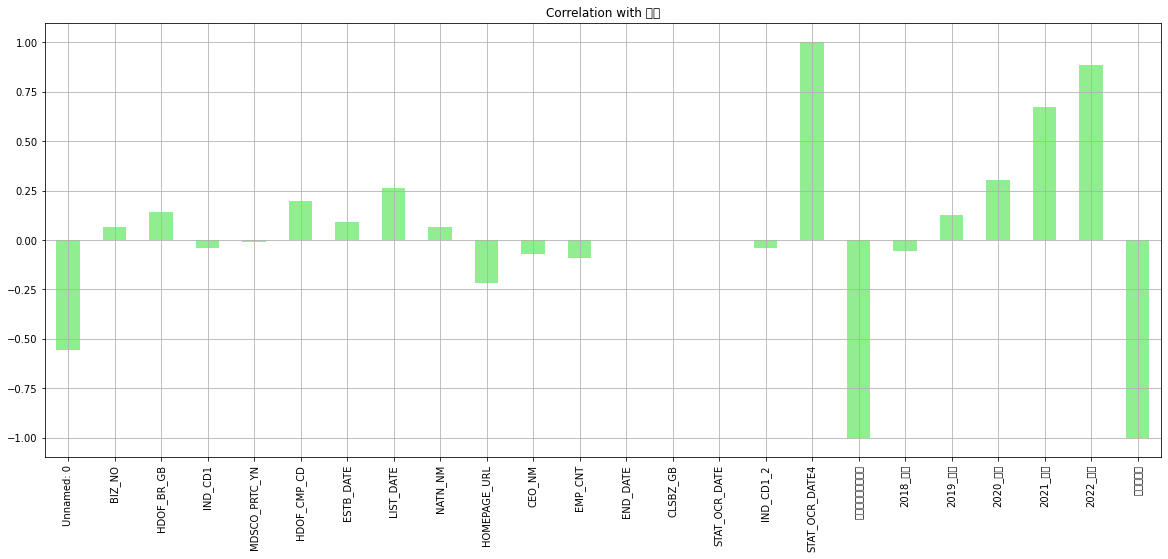

In [190]:
#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
#################### matplotlib 한글 깨짐 현상 해결 ####################

df_휴폐업.drop('부도', axis=1).corrwith(df_휴폐업.부도).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with 부도",color="lightgreen");

# 재무데이터랑 df_휴폐업이랑 합치기 

In [191]:
df_재무데이터 = df_재무데이터.rename(columns={'사업자번호':'BIZ_NO'})


In [192]:
df_휴폐업 = df_휴폐업.merge(df_재무데이터, how = 'left', left_on = 'BIZ_NO', right_on = 'BIZ_NO')


In [193]:
len(df_휴폐업['BIZ_NO'].unique())

35359

In [194]:
# df_휴폐업.drop(labels=['IND_CD1_2','CMP_NM1'],axis=1,inplace=True)

In [195]:
df_copy=df_휴폐업.dropna(subset=['자산총계'],how="any",axis=0)
print(df_copy['자산총계'].isna().sum())

0


In [196]:
import pandas as pd    
df_휴폐업.to_excel('./재무데이터까지합친_df휴폐업.xlsx')  


In [197]:
df_copy_drop = pd.read_csv('/content/drive/MyDrive/nice공모전/data/df_drop.csv')

In [198]:
! pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 31.4 MB/s 
     |████████████████████████████████| 133 kB 69.1 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=6f216dfe5588670a84735d6fde89238332f23945168d39713c0fdfb4a3823a82
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incomp

In [199]:
df_copy_drop.columns

Index(['Unnamed: 0', '사업자번호', 'BZ_TYP', 'HDOF_BR_GB', 'IND_CD1',
       'MDSCO_PRTC_YN', 'ESTB_DATE', 'NATN_NM', 'HOMEPAGE_URL', 'CEO_NM',
       'EMP_CNT', '부도', '결산년월', '유동자산', '매출채권', '비유동자산', '유형자산', '자산총계',
       '유동부채', '비유동부채', '부  채  총  계', '자본금', '이익잉여금(결손금）', '자본총계', '매출액',
       '판매비와관리비', '영업이익（손실）', '법인세비용차감전순손익', '법인세비용', '당기순이익(손실)', '기업순이익률(%)',
       '유보액/총자산(%)', '유보액/납입자본(%)', '매출액총이익률(%)', '매출액영업이익률(%)', '매출액순이익률(%)',
       '수지비율(%)', '경상수지비율', '영업비율(%)', '금융비용대매출액비율(%', '금융비용대부채비율(%)',
       '금융비용대총비용비율(%', '부채비율(%)', '차입금의존도(%)', '자기자본비율(%)', '순운전자본비율(%)',
       '유동부채비율(%)', '비유동부채비율(%)', '부채총계대 매출액(%)', '총자본회전율(회)', '재고자산회전율(회)',
       '매출채권회전율(회)', '매입채무회전율(회)', '미수금', '매출원가', '무형자산', '재고자산'],
      dtype='object')

In [200]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.7 MB/s 


In [201]:
# 실험

from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import eli5
from eli5.sklearn import PermutationImportance
feats = [col for col in df_copy_drop.columns if col != '부도']

model = LGBMClassifier(random_state=123)
# model = CatBoostClassifier(random_state=123)

y = df_copy_drop["부도"]
X = df_copy_drop.drop(["부도"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
print('Confusion matrix')
print(confusion_matrix(y_test, pred))

print(f"Precision : {precision_score(y_test, pred, average='macro'):.4f}")
print(f"Recall    : {recall_score(y_test, pred, average='macro'):.4f}")
print(f"F1        : {f1_score(y_test, pred, average='macro'):.4f}")
print(f"Accuracy  : {accuracy_score(y_test, pred):.4f}")


def 이엘아이파이브(model, x_data, y_data , i):
  i = i # 숫자
  x_data.iloc[[i]] # X_test
  a = eli5.show_prediction(model, x_data.iloc[i], feature_names=feats, show_feature_values=True)
  # perm = PermutationImportance(rf_model, scoring="precision")
  # perm.fit(x_data, y_data)   # X_test, y_test 
  # d = eli5.show_weights(perm, feature_names=feats)  # feats = [col for col in df_2018.columns if col != '2018_관리종목여부']  # 타겟값을 제외한 컬럼의 개수 == feats 
  return a


이엘아이파이브(model, X_test, y_test , 5)

Confusion matrix
[[4485    3]
 [   1  190]]
Precision : 0.9921
Recall    : 0.9970
F1        : 0.9946
Accuracy  : 0.9991


# K-SCORE

In [202]:
# 자산총계 , 자본총계  , 총자본회전율 , 이익잉여금(결손금)

In [203]:
df_휴폐업.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107967 entries, 0 to 107966
Data columns (total 76 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       107967 non-null  int64  
 1   BIZ_NO           107967 non-null  int64  
 2   CMP_NM           10245 non-null   object 
 3   BZ_TYP           107967 non-null  object 
 4   HDOF_BR_GB       107967 non-null  int64  
 5   IND_CD1          107967 non-null  int64  
 6   MDSCO_PRTC_YN    107967 non-null  int64  
 7   HDOF_CMP_CD      5561 non-null    float64
 8   ESTB_DATE        107967 non-null  int64  
 9   LIST_DATE        710 non-null     float64
 10  NATN_NM          107967 non-null  int64  
 11  HOMEPAGE_URL     107967 non-null  int64  
 12  CEO_NM           107967 non-null  int64  
 13  EMP_CNT          106320 non-null  float64
 14  END_DATE         107967 non-null  int64  
 15  CLSBZ_GB         10245 non-null   float64
 16  STAT_OCR_DATE    10245 non-null   floa

In [204]:
def altman_k_score(df):
  # year = ['2018', '2019', '2020', '2021']
  # for y in year:

  for col in df.columns:
    # if y in col:
    if '자산총계' in col:
      자산총계 = col
    if '총자본회전율' in col:
      총자본회전율 = col
    if '이익잉여금' in col:
      이익잉여금 = col
    if '자산총계' in col:
      자산총계 = col
    if '자본총계' in col:
      자본총계 = col
    
  df['X1'] = np.log(df['자산총계'])
  df['X2'] = np.log(df['총자본회전율(회)'])
  df['X3'] = df['이익잉여금(결손금）'] / df['자산총계']
  df['X4'] = df['자본총계'] / df['자산총계']

  df['K'] = -17.862 + 1.472 * df['X1'] + 3.041 * df['X2'] + 14.839 * df['X3'] + 1.516 * df['X4']
  return df


df_휴폐업2 = altman_k_score(df_휴폐업)

In [205]:
df_휴폐업2['K'].value_counts()
df_휴폐업2['K'].describe()


count    1.066510e+05
mean             -inf
std               NaN
min              -inf
25%      4.982142e+00
50%      1.104818e+01
75%      1.645460e+01
max      1.956482e+02
Name: K, dtype: float64

# 모델링 

In [206]:
# 모델링 

In [210]:

#------------------------------------------------------------------ CART(Classification and Regression Tree)
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVC, NuSVR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier,RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet  #----------------*****
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

#------------------------------------------------------------------ 증강학습

from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from imblearn.over_sampling import SMOTE

#------------------------------------------------------------------ 스케일링
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
#------------------------------------------------------------------ 튜닝관련

from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings(action='ignore')
sns.set()

In [238]:
df_휴폐업['BZ_TYP'].value_counts


<bound method IndexOpsMixin.value_counts of 0         4
1         4
2         4
3         4
4         4
         ..
107962    4
107963    4
107964    4
107965    4
107966    4
Name: BZ_TYP, Length: 107967, dtype: int8>

In [237]:
df_휴폐업['BZ_TYP']=df_휴폐업['BZ_TYP'].astype('category')
df_휴폐업['BZ_TYP']=df_휴폐업['BZ_TYP'].values.codes


In [223]:
df_휴폐업.drop(['2018_부도', '2019_부도', '2020_부도', '2021_부도', '2022_부도','CMP_NM','CMP_NM1','IND_CD1_2','X1', 'X2', 'X3','X4',],axis = 1, inplace = True)

In [242]:
df_휴폐업.isna()

,Unnamed: 0,BIZ_NO,BZ_TYP,HDOF_BR_GB,IND_CD1,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,LIST_DATE,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,END_DATE,CLSBZ_GB,STAT_OCR_DATE,부도,STAT_OCR_DATE4,휴폐업예측위한변수,예측을위한,결산년월,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,이익잉여금(결손금）,자본총계,매출액,판매비와관리비,영업이익（손실）,법인세비용차감전순손익,법인세비용,당기순이익(손실),기업순이익률(%),유보액/총자산(%),유보액/납입자본(%),매출액총이익률(%),매출액영업이익률(%),매출액순이익률(%),수지비율(%),경상수지비율,영업비율(%),금융비용대매출액비율(%,금융비용대부채비율(%),금융비용대총비용비율(%,부채비율(%),차입금의존도(%),자기자본비율(%),순운전자본비율(%),유동부채비율(%),비유동부채비율(%),부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,부채비율(%)_new,매출액영업이익률(%)_new,재고자산회전율(회)_new,K
0,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107962,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False
107963,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
107964,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,Fa

In [249]:
df_휴폐업 = df_휴폐업.fillna(0)

In [260]:
df_휴폐업 = df_휴폐업.replace('inf', 0)

In [263]:
df_휴폐업.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107967 entries, 0 to 107966
Data columns (total 69 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       107967 non-null  int64  
 1   BIZ_NO           107967 non-null  int64  
 2   BZ_TYP           107967 non-null  int8   
 3   HDOF_BR_GB       107967 non-null  int64  
 4   IND_CD1          107967 non-null  int64  
 5   MDSCO_PRTC_YN    107967 non-null  int64  
 6   HDOF_CMP_CD      107967 non-null  float64
 7   ESTB_DATE        107967 non-null  int64  
 8   LIST_DATE        107967 non-null  float64
 9   NATN_NM          107967 non-null  int64  
 10  HOMEPAGE_URL     107967 non-null  int64  
 11  CEO_NM           107967 non-null  int64  
 12  EMP_CNT          107967 non-null  float64
 13  END_DATE         107967 non-null  int64  
 14  CLSBZ_GB         107967 non-null  float64
 15  STAT_OCR_DATE    107967 non-null  float64
 16  부도               107967 non-null  int6

In [271]:
df_휴폐업.head()

,Unnamed: 0,BIZ_NO,BZ_TYP,HDOF_BR_GB,IND_CD1,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,LIST_DATE,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,END_DATE,CLSBZ_GB,STAT_OCR_DATE,부도,STAT_OCR_DATE4,휴폐업예측위한변수,예측을위한,결산년월,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,이익잉여금(결손금）,자본총계,매출액,판매비와관리비,영업이익（손실）,법인세비용차감전순손익,법인세비용,당기순이익(손실),기업순이익률(%),유보액/총자산(%),유보액/납입자본(%),매출액총이익률(%),매출액영업이익률(%),매출액순이익률(%),수지비율(%),경상수지비율,영업비율(%),금융비용대매출액비율(%,금융비용대부채비율(%),금융비용대총비용비율(%,부채비율(%),차입금의존도(%),자기자본비율(%),순운전자본비율(%),유동부채비율(%),비유동부채비율(%),부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,부채비율(%)_new,매출액영업이익률(%)_new,재고자산회전율(회)_new,K
0,0,2698800776,4,1,71,0,0.0,2017,0.0,1,1,0,15.0,9999,3.0,20210630.0,1,2021,7978.0,7978.0,20181231.0,1768000.0,1412000.0,221000.0,95000.0,1989000.0,1592000.0,18000.0,1610000.0,1000000.0,-621000.0,379000.0,3302000.0,701000.0,-532000.0,-514000.0,0.0,-514000.0,-3.444800e+01,-31.222,-62.100,5.118,-16.111,-15.566,115.435,1.297140e+02,116.111,0.121,4.730000e-01,0.104,424.802,1.005500e+01,1.000000e+12,8.849,1.000000e+12,1.000000e+12,4.875800e+01,2.230000e+00,1.000000e+12,4.345000e+00,5.216000e+00,2000.0,3133000.0,66000.0,48000.0,1.0,1.0,0.0,1.581393
1,1,3058633074,4,1,46,0,0.0,2014,0.0,1,0,0,0.0,9999,3.0,20220715.0,1,2022,7977.0,7977.0,20181231.0,139634.0,136107.0,49314.0,13314.0,188948.0,165556.0,0.0,165556.0,10000.0,13392.0,23392.0,3346488.0,79045.0,24726.0,-7954.0,0.0,-7954.0,1.000000e+12,7.088,133.920,3.101,0.739,-0.238,100.238,1.000000e+12,99.261,0.016,1.000000e+12,0.016,707.746,2.318600e+01,1.238000e+01,-13.719,7.077460e+02,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,61.0,3242717.0,0.0,0.0,1.0,1.0,0.0,85.287019
2,1,3058633074,4,1,46,0,0.0,2014,0.0,1,0,0,0.0,9999,3.0,20220715.0,1,2022,7977.0,7977.0,20191231.0,283623.0,196244.0,43097.0,7097.0,326720.0,269465.0,0.0,269465.0,10000.0,47255.0,57255.0,4179365.0,109402.0,74623.0,36887.0,3024.0,33863.0,1.324000e+01,14.464,472.550,4.403,1.786,0.810,99.117,5.166670e+02,98.215,0.007,1.260000e-01,0.007,470.640,1.000000e+12,1.752400e+01,4.333,4.706400e+02,1.000000e+12,6.448000e+00,1.621000e+01,1.000000e+12,2.515000e+01,2.243300e+01,357.0,3995340.0,0.0,0.0,1.0,1.0,0.0,11.710771
3,2,1238160386,4,1,26,0,0.0,2000,0.0,1,1,0,16.0,9999,3.0,20200117.0,1,2020,7979.0,7979.0,20181231.0,2715639.0,960484.0,4809244.0,4083259.0,7524883.0,2352608.0,1885000.0,4237608.0,325000.0,1095411.0,3287275.0,2822489.0,508841.0,64725.0,10773.0,145.0,10628.0,2.853000e+00,19.541,452.434,20.321,2.293,0.377,99.638,9.863800e+01,97.707,7.100,4.871000e+00,6.760,128.909,4.567100e+01,4.368500e+01,4.824,7.156700e+01,5.734200e+01,1.501370e+02,3.820000e-01,1.650000e+00,3.210000e+00,1.627500e+01,571.0,2248922.0,714535.0,1595615.0,0.0,1.0,1.0,5.341196
4,3,5078600989,4,1,75,0,0.0,2017,0.0,1,0,1,23.0,9999,3.0,20211130.0,1,2021,7978.0,7978.0,20181231.0,2046818.0,2882.0,230382.0,21665.0,2277200.0,1768685.0,300000.0,2068685.0,100000.0,108516.0,208516.0,2311323.0,2330493.0,-19170.0,11379.0,1210.0,10169.0,8.520000e-01,4.765,108.516,100.000,-0.829,0.440,99.515,9.855000e+01,100.829,0.158,2.580000e-01,0.157,992.099,1.690900e+01,9.157000e+00,12.214,8.482250e+02,1.438740e+02,8.950200e+01,1.424000e+00,1.000000e+12,1.603972e+03,2.731740e+02,124855.0,0.0,0.0,0.0,1.0,1.0,0.0,5.606653


In [273]:
df_휴폐업.drop(['Unnamed: 0','STAT_OCR_DATE','결산년월'],axis = 1, inplace=True)

In [283]:
# np.isnan(df_휴폐업.any()) #and gets False
# np.isfinite(df_휴폐업.any()) 

In [290]:
df_휴폐업.replace([np.inf, -np.inf], np.nan, inplace=True)

In [291]:
y = df_휴폐업["BIZ_NO"]
X = df_휴폐업.drop(["BIZ_NO"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model = RandomForestClassifier(random_state=123)
model.fit(X_train ,y_train)
pred = model.predict(X_test)

print(confusion_matrix(y_test, pred))
print(f"{name}  ---- Accuracy  : {accuracy_score(y_test, pred):.4f}")

ValueError: ignored

In [265]:


models = [ ("RF", RandomForestClassifier(random_state=123))
           ,("EX", ExtraTreesClassifier(random_state=123)),
           ("LGBM", LGBMClassifier(random_state=123)),
           ("GB",GradientBoostingClassifier(random_state=123))
           ,("CB", CatBoostClassifier(random_state=123))
           ]

y = df_휴폐업["BIZ_NO"]
X = df_휴폐업.drop(["BIZ_NO"], axis=1)


def my_eval(X,y,models)   :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
    for (name, model) in models:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        pred_proba = model.predict_proba(X_test)
        print('Confusion matrix')
        print(confusion_matrix(y_test, pred))


        #print(f"Precision : {precision_score(y_test, pred, average='macro'):.4f}")
        # print(f"Recall    : {recall_score(y_test, pred, average='macro'):.4f}")
        # print(f"F1        : {f1_score(y_test, pred, average='macro'):.4f}")
        print(f"{name}  ---- Accuracy  : {accuracy_score(y_test, pred):.4f}")
        
    
        s = pd.Series(model.feature_importances_, index=X.columns)
        s.plot.bar()
        plt.show()
        plt.close()

      

In [270]:
my_eval(X,y,models)

ValueError: ignored